In [1]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub

didiersalazar_lab2_dataset_path = kagglehub.dataset_download('didiersalazar/lab2-dataset')
didiersalazar_pictures_path = kagglehub.dataset_download('didiersalazar/pictures')
didiersalazar_google_news_vectors_path = kagglehub.dataset_download('didiersalazar/google-news-vectors')

print('Data source import complete.')


100%|██████████| 400k/400k [00:00<00:00, 57.3MB/s]

Extracting files...


100%|██████████| 3.29M/3.29M [00:00<00:00, 64.6MB/s]

Extracting files...


100%|██████████| 1.64G/1.64G [00:19<00:00, 90.2MB/s]

Extracting files...


Data source import complete.


In [2]:
!pip3 install scikit-learn --upgrade
!pip3 install pandas --upgrade
!pip3 install numpy --upgrade
!pip3 install matplotlib --upgrade
!pip3 install plotly --upgrade
!pip3 install seaborn --upgrade
!pip3 install nltk --upgrade
!pip3 install umap-learn --upgrade

!pip3 install gensim --upgrade
#!pip3 install tensorflow --upgrade
!pip3 install tensorflow==2.17.0
!pip3 install keras --upgrade

!pip3 install ollama --upgrade
!pip3 install langchain --upgrade
!pip3 install langchain_community --upgrade
!pip3 install langchain_core --upgrade
!pip3 install beautifulsoup4 --upgrade
!pip3 install chromadb --upgrade
!pip3 install gradio --upgrade

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 101.7 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 2.2.2
    Uninstalling pandas-2.2.2:
      Successfully uninstalled pandas-2.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 24.10.1 requires pandas<2.2.3dev0,>=2.0, but you have pandas 2.2.3 which is incompatible.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 2.2.3 which is incompatible.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.3/16.3 MB 105.4 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
ERROR: pip

In [86]:
#Download ollama
!curl -fsSL https://ollama.com/install.sh | sh
import subprocess
process = subprocess.Popen("ollama serve", shell=True) #runs on a different thread

>>> Installing ollama to /usr/local
>>> Downloading Linux amd64 bundle
############################################################################################# 100.0%
>>> Adding ollama user to video group...
>>> Adding current user to ollama group...
>>> Creating ollama systemd service...
>>> The Ollama API is now available at 127.0.0.1:11434.
>>> Install complete. Run "ollama" from the command line.


In [87]:
#Download model llama 3.2:1b
!ollama pull llama3.2:1b

pulling manifest ⠋ pulling manifest ⠙ pulling manifest ⠹ pulling manifest ⠸ pulling manifest ⠼ pulling manifest ⠴ pulling manifest 
pulling 74701a8c35f6... 100% ▕▏ 1.3 GB                         
pulling 966de95ca8a6... 100% ▕▏ 1.4 KB                         
pulling fcc5a6bec9da... 100% ▕▏ 7.7 KB                         
pulling a70ff7e570d9... 100% ▕▏ 6.0 KB                         
pulling 4f659a1e86d7... 100% ▕▏  485 B                         
verifying sha256 digest 
writing manifest 
success 


In [5]:
#Download model llama 3.2
!ollama pull llama3.2

pulling manifest ⠙ pulling manifest ⠹ pulling manifest ⠸ pulling manifest ⠸ pulling manifest ⠴ pulling manifest ⠦ pulling manifest ⠦ pulling manifest ⠧ pulling manifest ⠏ pulling manifest ⠏ pulling manifest ⠋ pulling manifest ⠹ pulling manifest ⠸ pulling manifest ⠸ pulling manifest ⠴ pulling manifest ⠦ pulling manifest ⠦ pulling manifest ⠧ pulling manifest 
pulling dde5aa3fc5ff...   0% ▕▏    0 B/2.0 GB                  pulling manifest 
pulling dde5aa3fc5ff...   0% ▕▏    0 B/2.0 GB                  pulling manifest 
pulling dde5aa3fc5ff...   0% ▕▏    0 B/2.0 GB                  pulling manifest 
pulling dde5aa3fc5ff...   1% ▕▏  19 MB/2.0 GB                  pulling manifest 
pulling dde5aa3fc5ff...   2% ▕▏  42 MB/2.0 GB                  pulling manifest 
pulling dde5aa3fc5ff...   3% ▕▏  57 MB/2.0 GB                  pulling manifest 
pulling dde5aa3fc5ff...   4% ▕▏  88 MB/2.0 GB                  pulling manifest 
pulling dde5aa3fc5ff...   6% ▕▏ 117 MB/2.0 GB                  pulling ma

In [88]:
#Download model llava-phi3
!ollama pull llava-phi3

pulling manifest ⠋ pulling manifest ⠙ pulling manifest ⠹ pulling manifest ⠸ pulling manifest 
pulling 377876be20ba... 100% ▕▏ 2.3 GB                         
pulling 004fc0969720... 100% ▕▏ 607 MB                         
pulling c608dc615584... 100% ▕▏  149 B                         
pulling cadf483f03b5... 100% ▕▏  155 B                         
pulling 3921dac664c1... 100% ▕▏  492 B                         
verifying sha256 digest 
writing manifest 
success 


In [89]:
# import library
import pandas as pd
import numpy as np
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import umap
import gensim
import tensorflow
import keras
import ollama
import langchain
import langchain_community
import langchain_core
import bs4
import chromadb
import gradio

%matplotlib inline

print("gensim: " + gensim.__version__)
print("tensorflow: " + tensorflow.__version__)
print("keras: " + keras.__version__)

gensim: 4.3.3
tensorflow: 2.17.0
keras: 3.7.0


# Data Mining Lab 2
In this lab session we will focus on the use of Neural Word Embeddings and exploring some basic open source LLMs' applications to data.

## Table of Contents
1. Data preparation
2. Feature engineering
3. Model
4. Results evaluation
5. Other things you could try
6. Deep Learning
7. Word to Vector
8. Clustering
9. High-dimension Visualization
10. Large Language Models (LLMs)


### Necessary Library Requirements:

#### Same as Lab1 except PAMI:
- [Jupyter](http://jupyter.org/) (Strongly recommended but not required)
    - Install via `pip3 install jupyter` and use `jupyter notebook` in terminal to run
- [Scikit Learn](http://scikit-learn.org/stable/index.html)
    - Install via `pip3 install scikit-learn` from a terminal
- [Pandas](http://pandas.pydata.org/)
    - Install via `pip3 install pandas` from a terminal
- [Numpy](http://www.numpy.org/)
    - Install via `pip3 install numpy` from a terminal
- [Matplotlib](https://matplotlib.org/)
    - Install via `pip3 install maplotlib` from a terminal
- [Plotly](https://plot.ly/)
    - Install via `pip3 install plotly` from a terminal
- [Seaborn](https://seaborn.pydata.org/)
    - Install via `pip3 install seaborn`
- [NLTK](http://www.nltk.org/)
    - Install via `pip3 install nltk` from a terminal
- [UMAP](https://umap-learn.readthedocs.io/en/latest/)
    - Install via `pip3 install umap-learn` from a terminal
    

#### New Libraries to install:
- [Gensim](https://pypi.org/project/gensim/)
    - Install via `pip3 install gensim`

- [tensorflow](https://www.tensorflow.org/)
    - Install via `pip3 install tensorflow`
    - Also install `pip3 install tensorflow-hub`

- [Keras](https://keras.io/)
    - Install via `pip3 install keras`

- [Ollama](https://ollama.com)
    - Install via `pip3 install ollama`

- [langchain](https://www.langchain.com)
    - Install via `pip3 install langchain`
    - Also install `pip3 install langchain_community`
    - Also install `pip3 install langchain_core`
    
- [beautifulsoup4](https://pypi.org/project/beautifulsoup4/)
    - Install via `pip3 install beautifulsoup4`
    
- [chromadb](https://www.trychroma.com)
    - Install via `pip3 install chromadb`
    
- [gradio](https://www.gradio.app)
    - Install via `pip3 install gradio`
    
#### Open-source LLMs to install:
- ollama run llama3.2
- ollama run llama3.2:1b  (optional if the first one is too big)
- ollama run llava-phi3

---
## Introduction

**Dataset:** [SemEval 2017 Task](https://competitions.codalab.org/competitions/16380)

**Task:** Classify text data into 4 different emotions using word embeddings and other deep information retrieval approaches.

![pic0.png](https://github.com/didiersalazar/DM2024-Lab2-Master/blob/main/pics/pic0.png?raw=true)

---
## 1. Data Preparation

Before beggining the lab, please make sure to download the [Google News Dataset](https://drive.google.com/file/d/0B7XkCwpI5KDYNlNUTTlSS21pQmM/edit) and place it in a folder named "GoogleNews" in the same directory as this file.



```
# This is formatted as code
```

## 1.1 Load data

We start by loading the csv files into a single pandas dataframe for training and one for testing.

In [8]:
import pandas as pd

### training data
anger_train = pd.read_csv(f"{didiersalazar_lab2_dataset_path}/data/semeval/train/anger-ratings-0to1.train.txt",
                         sep="\t", header=None,names=["id", "text", "emotion", "intensity"])
sadness_train = pd.read_csv(f"{didiersalazar_lab2_dataset_path}/data/semeval/train/sadness-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
fear_train = pd.read_csv(f"{didiersalazar_lab2_dataset_path}/data/semeval/train/fear-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
joy_train = pd.read_csv(f"{didiersalazar_lab2_dataset_path}/data/semeval/train/joy-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])

In [9]:
# combine 4 sub-dataset
train_df = pd.concat([anger_train, fear_train, joy_train, sadness_train], ignore_index=True)

In [10]:
### testing data
anger_test = pd.read_csv(f"{didiersalazar_lab2_dataset_path}/data/semeval/dev/anger-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None,names=["id", "text", "emotion", "intensity"])
sadness_test = pd.read_csv(f"{didiersalazar_lab2_dataset_path}/data/semeval/dev/sadness-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
fear_test = pd.read_csv(f"{didiersalazar_lab2_dataset_path}/data/semeval/dev/fear-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
joy_test = pd.read_csv(f"{didiersalazar_lab2_dataset_path}/data/semeval/dev/joy-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])

# combine 4 sub-dataset
test_df = pd.concat([anger_test, fear_test, joy_test, sadness_test], ignore_index=True)
train_df.head()

,id,text,emotion,intensity
0,10000,How the fu*k! Who the heck! moved my fridge!.....,anger,0.938
1,10001,So my Indian Uber driver just called someone t...,anger,0.896
2,10002,@DPD_UK I asked for my parcel to be delivered ...,anger,0.896
3,10003,so ef whichever butt wipe pulled the fire alar...,anger,0.896
4,10004,Don't join @BTCare they put the phone down on ...,anger,0.896


In [11]:
# shuffle dataset
train_df = train_df.sample(frac=1)
test_df = test_df.sample(frac=1)

In [12]:
print("Shape of Training df: ", train_df.shape)
print("Shape of Testing df: ", test_df.shape)

Shape of Training df:  (3613, 4)
Shape of Testing df:  (347, 4)


---
### ** >>> Exercise 1 (Take home): **  
Plot word frequency for Top 30 words in both train and test dataset. (Hint: refer to DM lab 1)


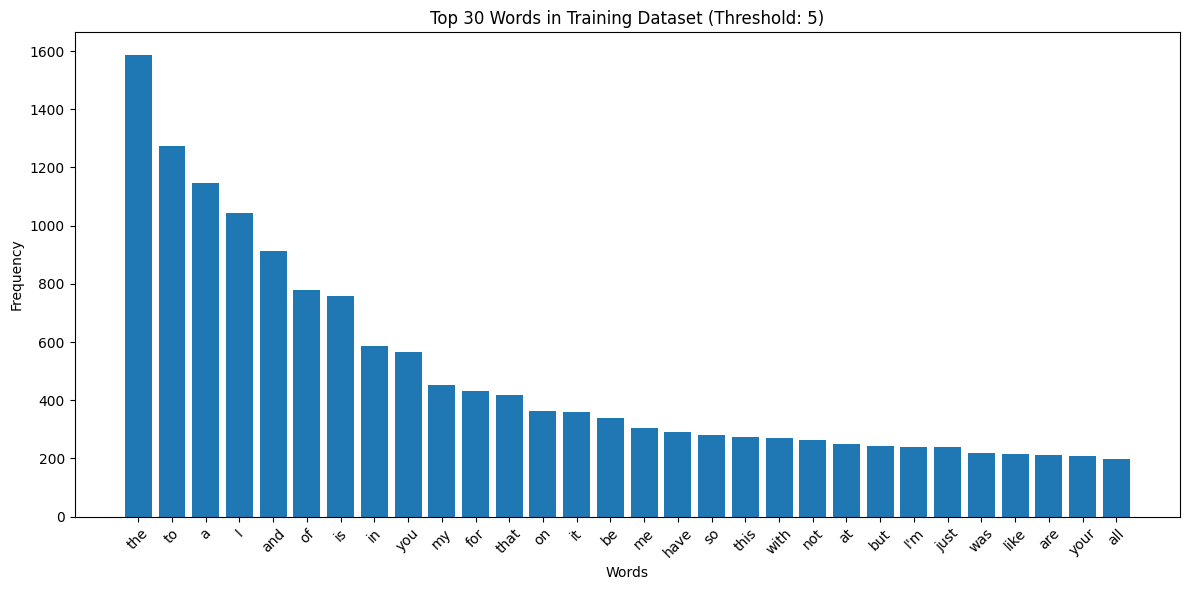

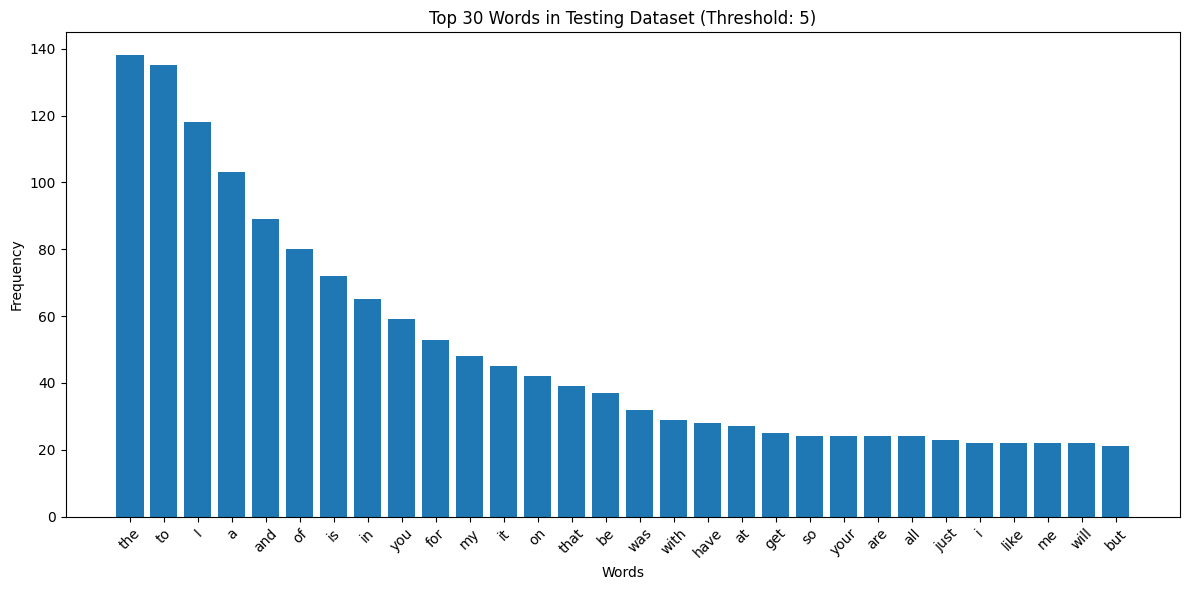

In [13]:
# Define function to get top N words with frequency threshold manually (without Counter)
def get_top_words_with_threshold_no_counter(df, column, top_n=30, freq_threshold=10):
    """
    Extracts the top_n most frequent words from the specified column of a dataframe without using Counter.
    Filters words with a frequency lower than the specified threshold.
    """
    # Ensure the column contains strings
    df[column] = df[column].astype(str)

    # Concatenate all text and split into words
    all_words = " ".join(df[column]).split()

    # Count word frequencies manually
    word_freq = {}
    for word in all_words:
        if word in word_freq:
            word_freq[word] += 1
        else:
            word_freq[word] = 1

    # Filter words based on frequency threshold
    filtered_word_freq = {word: count for word, count in word_freq.items() if count >= freq_threshold}

    # Sort words by frequency in descending order
    sorted_word_freq = sorted(filtered_word_freq.items(), key=lambda x: x[1], reverse=True)
    return sorted_word_freq[:top_n]

# Plot word frequencies
def plot_word_frequencies(word_freq, title):
    """
    Plots a bar chart for word frequencies.
    """
    words, counts = zip(*word_freq)
    plt.figure(figsize=(12, 6))
    plt.bar(words, counts)
    plt.title(title)
    plt.xlabel("Words")
    plt.ylabel("Frequency")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Assuming `train_df` and `test_df` are loaded with a 'text' column
if 'train_df' in locals() and 'test_df' in locals():
    # Get top 30 words for train and test datasets with a frequency threshold of 5
    top_train_words = get_top_words_with_threshold_no_counter(train_df, 'text', top_n=30, freq_threshold=5)
    top_test_words = get_top_words_with_threshold_no_counter(test_df, 'text', top_n=30, freq_threshold=5)

    # Plot the word frequencies
    plot_word_frequencies(top_train_words, "Top 30 Words in Training Dataset (Threshold: 5)")
    plot_word_frequencies(top_test_words, "Top 30 Words in Testing Dataset (Threshold: 5)")
else:
    print("Dataframes 'train_df' and 'test_df' are not loaded.")

---
### 1.2 Save data

We will save our data in Pickle format. The pickle module implements binary protocols for serializing and de-serializing a Python object structure.   
  
Some advantages for using pickle structure:  
* Because it stores the attribute type, it's more convenient for cross-platform use.  
* When your data is huge, it could use less space to store also consume less loading time.   

In [14]:
## save to pickle file
train_df.to_pickle("train_df.pkl")
test_df.to_pickle("test_df.pkl")

In [15]:
import pandas as pd

## load a pickle file
train_df = pd.read_pickle("train_df.pkl")
test_df = pd.read_pickle("test_df.pkl")

For more information: https://reurl.cc/0Dzqx

---
### 1.3 Exploratory data analysis (EDA)

Again, before getting our hands dirty, we need to explore a little bit and understand the data we're dealing with.

In [16]:
# group to find distribution
train_df.groupby(['emotion']).count()['text']

,text
emotion,
anger,857
fear,1147
joy,823
sadness,786


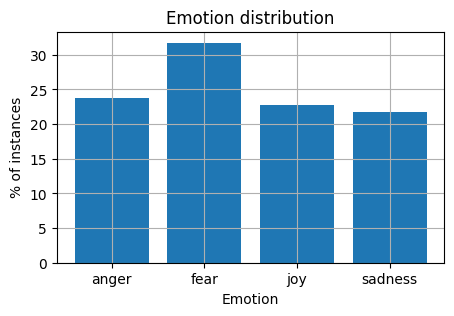

In [17]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# the histogram of the data
labels = train_df['emotion'].unique()
post_total = len(train_df)
df1 = train_df.groupby(['emotion']).count()['text']
df1 = df1.apply(lambda x: round(x*100/post_total,3))

#plot
fig, ax = plt.subplots(figsize=(5,3))
plt.bar(df1.index,df1.values)

#arrange
plt.ylabel('% of instances')
plt.xlabel('Emotion')
plt.title('Emotion distribution')
plt.grid(True)
plt.show()

---

## 2. Feature engineering
### Using Bag of Words
Using scikit-learn ```CountVectorizer``` perform word frequency and use these as features to train a model.  
http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html

In [18]:
from sklearn.feature_extraction.text import CountVectorizer

In [19]:
# build analyzers (bag-of-words)
BOW_vectorizer = CountVectorizer()

In [20]:
# 1. Learn a vocabulary dictionary of all tokens in the raw documents.
BOW_vectorizer.fit(train_df['text'])

# 2. Transform documents to document-term matrix.
train_data_BOW_features = BOW_vectorizer.transform(train_df['text'])
test_data_BOW_features = BOW_vectorizer.transform(test_df['text'])

In [21]:
# check the result
train_data_BOW_features

<3613x10115 sparse matrix of type '<class 'numpy.int64'>'
	with 51467 stored elements in Compressed Sparse Row format>

In [22]:
type(train_data_BOW_features)

scipy.sparse._csr.csr_matrix

In [23]:
# add .toarray() to show
train_data_BOW_features.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [24]:
# check the dimension
train_data_BOW_features.shape

(3613, 10115)

In [25]:
# observe some feature names
feature_names = BOW_vectorizer.get_feature_names_out()
feature_names[100:110]

array(['2k17', '2much', '2nd', '30', '300', '301', '30am', '30pm', '30s',
       '31'], dtype=object)

The embedding is done. We can technically feed this into our model. However, depending on the embedding technique you use and your model, your accuracy might not be as high, because:

* curse of dimensionality  (we have 10,115 dimension now)
* some important features are ignored (for example, some models using emoticons yeld better performance than counterparts)

In [26]:
"😂" in feature_names

False

Let's try using another tokenizer below.

In [27]:
import nltk
nltk.download('punkt_tab')
# build analyzers (bag-of-words)
BOW_500 = CountVectorizer(max_features=500, tokenizer=nltk.word_tokenize)

# apply analyzer to training data
BOW_500.fit(train_df['text'])

train_data_BOW_features_500 = BOW_500.transform(train_df['text'])

## check dimension
train_data_BOW_features_500.shape

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:521: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


(3613, 500)

In [28]:
train_data_BOW_features_500.toarray()

array([[9, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 4, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [2, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [29]:
# observe some feature names
feature_names_500 = BOW_500.get_feature_names_out()
feature_names_500[100:110]

array(['change', 'cheer', 'cheerful', 'cheering', 'cheery', 'come',
       'comes', 'could', 'country', 'cry'], dtype=object)

In [30]:
"😂" in feature_names_500

True

---
### ** >>> Exercise 2 (Take home): **  
Generate an embedding using the TF-IDF vectorizer instead of th BOW one with 1000 features and show the feature names for features [100:110].

In [31]:
# Answer here
from sklearn.feature_extraction.text import TfidfVectorizer
nltk.download('punkt')

# Build TF-IDF Vectorizer with max features = 1000
TFIDF_vectorizer = TfidfVectorizer(max_features=1000, tokenizer=nltk.word_tokenize)

# Fit and transform the training data
TFIDF_vectorizer.fit(train_df['text'])

# Transform both training and testing datasets
train_data_TFIDF_features = TFIDF_vectorizer.transform(train_df['text'])
test_data_TFIDF_features = TFIDF_vectorizer.transform(test_df['text'])

# Check the dimension of the resulting embeddings
print("Shape of training TF-IDF features:", train_data_TFIDF_features.shape)

# Convert the TF-IDF features to an array (optional for visualization)
train_data_TFIDF_array = train_data_TFIDF_features.toarray()

# Observe feature names for indices [100:110]
feature_names_TFIDF = TFIDF_vectorizer.get_feature_names_out()
selected_features = feature_names_TFIDF[100:110]

print("Selected Features (100-110):", selected_features)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


Shape of training TF-IDF features: (3613, 1000)
Selected Features (100-110): ['attacks' 'awareness' 'away' 'awe' 'awesome' 'awful' 'b' 'baby' 'back'
 'bad']


---
## 3. Model
### 3.1 Decision Trees
Using scikit-learn ```DecisionTreeClassifier``` performs word frequency and uses these as features to train a model.  
http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier

In [32]:
from sklearn.tree import DecisionTreeClassifier

# for a classificaiton problem, you need to provide both training & testing data
X_train = BOW_500.transform(train_df['text'])
y_train = train_df['emotion']

X_test = BOW_500.transform(test_df['text'])
y_test = test_df['emotion']

## take a look at data dimension is a good habit  :)
print('X_train.shape: ', X_train.shape)
print('y_train.shape: ', y_train.shape)
print('X_test.shape: ', X_test.shape)
print('y_test.shape: ', y_test.shape)

X_train.shape:  (3613, 500)
y_train.shape:  (3613,)
X_test.shape:  (347, 500)
y_test.shape:  (347,)


In [33]:
## build DecisionTree model
DT_model = DecisionTreeClassifier(random_state=1)

## training!
DT_model = DT_model.fit(X_train, y_train)

## predict!
y_train_pred = DT_model.predict(X_train)
y_test_pred = DT_model.predict(X_test)

## so we get the pred result
y_test_pred[:10]

array(['anger', 'sadness', 'anger', 'sadness', 'fear', 'fear', 'anger',
       'sadness', 'fear', 'sadness'], dtype=object)

---
## 4. Results Evaluation

Now we will check the results of our model's performance

In [34]:
## accuracy
from sklearn.metrics import accuracy_score

acc_train = accuracy_score(y_true=y_train, y_pred=y_train_pred)
acc_test = accuracy_score(y_true=y_test, y_pred=y_test_pred)

print('training accuracy: {}'.format(round(acc_train, 2)))
print('testing accuracy: {}'.format(round(acc_test, 2)))


training accuracy: 0.99
testing accuracy: 0.66


In [35]:
## precision, recall, f1-score,
from sklearn.metrics import classification_report

print(classification_report(y_true=y_test, y_pred=y_test_pred))

              precision    recall  f1-score   support

       anger       0.62      0.71      0.67        84
        fear       0.67      0.63      0.65       110
         joy       0.74      0.67      0.70        79
     sadness       0.62      0.64      0.63        74

    accuracy                           0.66       347
   macro avg       0.66      0.66      0.66       347
weighted avg       0.66      0.66      0.66       347



In [36]:
## check by confusion matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_true=y_test, y_pred=y_test_pred)
print(cm)

[[60 11  7  6]
 [20 69  7 14]
 [ 6 11 53  9]
 [10 12  5 47]]


In [37]:
# Funciton for visualizing confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes, title='Confusion matrix',
                          cmap=sns.cubehelix_palette(as_cmap=True)):
    """
    This function is modified from:
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    """
    classes.sort()
    tick_marks = np.arange(len(classes))

    fig, ax = plt.subplots(figsize=(5,5))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels = classes,
           yticklabels = classes,
           title = title,
           xlabel = 'Predicted label',
           ylabel = 'True label')

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")
    ylim_top = len(classes) - 0.5
    plt.ylim([ylim_top, -.5])
    plt.tight_layout()
    plt.show()

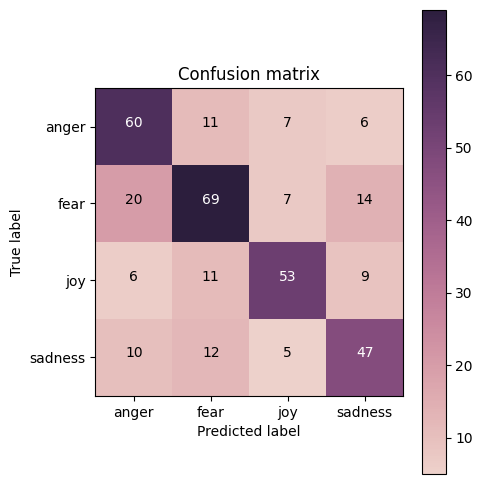

In [38]:
# plot your confusion matrix
my_tags = ['anger', 'fear', 'joy', 'sadness']
plot_confusion_matrix(cm, classes=my_tags, title='Confusion matrix')

---
### ** >>> Exercise 3 (Take home): **  
Can you interpret the results above? What do they mean?

The confusion matrix of model performance on the four emotion categories-**anger**, **fear**, **joy**, and **sadness**-are on the diagonals. The model performs best on **fear** with 69 correct and **anger** with 60 correct classifications, though there is considerable misclassification, such as 20 fear cases predicted as anger and 12 cases of sadness misclassified as fear. These kinds of errors suggest that the model does poorly in terms of rejecting similar facial expressions for specific emotions or context.

Overall, the model classifies fear and anger quite well but performs worse for sadness and joy because of overlapping semantics and possible ambiguities in the text. Improvements such as dataset balancing or fine-tuning of the model for the specific task could result in fewer misclassifications and generally higher overall accuracy.

---
### ** >>> Exercise 4 (Take home): **  
Build a model using a ```Naive Bayes``` model and train it. What are the testing results?

*Reference*: https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:521: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


Naive Bayes Training Accuracy: 0.79
Naive Bayes Testing Accuracy: 0.71
Confusion Matrix (Naive Bayes):
 [[56 14  5  9]
 [ 7 89  5  9]
 [11  7 55  6]
 [12 10  6 46]]


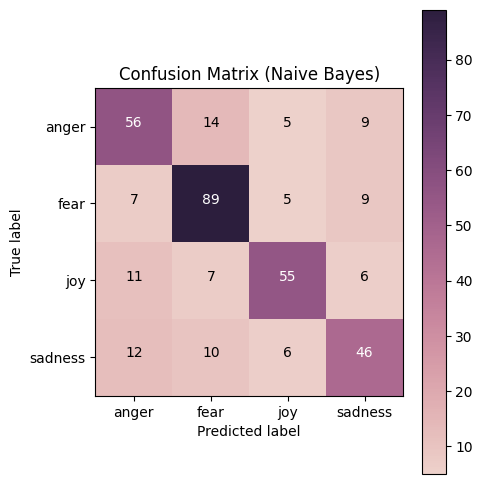

In [39]:
# Answer here
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix
import nltk

nltk.download('punkt')

# Build a Bag-of-Words vectorizer with a max feature limit
BOW_500 = CountVectorizer(max_features=500, tokenizer=nltk.word_tokenize)

# Apply Bag-of-Words vectorizer to the training and testing data
BOW_500.fit(train_df['text'])
X_train = BOW_500.transform(train_df['text'])
y_train = train_df['emotion']
X_test = BOW_500.transform(test_df['text'])
y_test = test_df['emotion']

# Build and train a Naive Bayes model
NB_model = MultinomialNB()
NB_model.fit(X_train, y_train)

# Predict on the training and testing datasets
y_train_pred_nb = NB_model.predict(X_train)
y_test_pred_nb = NB_model.predict(X_test)

# Calculate accuracy
acc_train_nb = accuracy_score(y_true=y_train, y_pred=y_train_pred_nb)
acc_test_nb = accuracy_score(y_true=y_test, y_pred=y_test_pred_nb)

print('Naive Bayes Training Accuracy: {:.2f}'.format(acc_train_nb))
print('Naive Bayes Testing Accuracy: {:.2f}'.format(acc_test_nb))

# Generate confusion matrix
cm_nb = confusion_matrix(y_true=y_test, y_pred=y_test_pred_nb)
print("Confusion Matrix (Naive Bayes):\n", cm_nb)

# Plot the confusion matrix
my_tags = ['anger', 'fear', 'joy', 'sadness']
plot_confusion_matrix(cm_nb, classes=my_tags, title='Confusion Matrix (Naive Bayes)')

---
### ** >>> Exercise 5 (Take home): **  

How do the results from the Naive Bayes model and the Decision Tree model compare? How do you interpret these differences? Use the theoretical background covered in class to try and explain these differences.

The Naive Bayes model outperforms the Decision Tree model in generalization, achieving a testing accuracy of 71% against the Decision Tree's 66%. This is despite the Decision Tree having an astronomically higher training accuracy, at 99%, showing it overfits the training data. One common problem with Decision Trees is overfitting to the data on which they've been trained by creating splits which are very specific, thus generalizing poorly to unseen data.

On the class-specific performance of the models, the Decision Tree performs pretty well with the "anger" and "joy" categories, while falling behind on "fear" and "sadness," expectedly due to its tendency to be noisy and develop imbalanced splits. This is while Naive Bayes, having an implicit assumption of feature independence in its model, performs particularly well on "fear," while its overall performance over all categories is more robust. Herein lies its suitability in high-dimensional data like text classification, where approximations of independence between features can hold more reasonably.

In summary, the Naive Bayes model generalizes better and is more consistent across all classes, while the Decision Tree model has overfitting that leads to lower testing accuracy and more variability class-specific. These results emphasize the importance of considering model bias-variance trade-offs when choosing an algorithm for a given task.

---

## 5. Other things you can try

Thus, there are several things you can try that will affect your results. In order to yield better results, you can experiment by:
- Trying different features (Feature engineering)e.g Word2Vec, PCA, LDA, FastText, Clustering
- Trying different models
- Analyzing your results and interpret them to improve your feature engineering/model building process
- Iterate through the steps above until finding a satisfying result

Remember that you should also consider the task at hand and the model you'll feed the data to.

---
## 6. Deep Learning

We use [Keras](https://keras.io/) to be our deep learning framework, and follow the [Model (functional API)](https://keras.io/models/model/) to build a Deep Neural Network (DNN) model. Keras runs with Tensorflow in the backend. It's a nice abstraction to start working with NN models.

Because Deep Learning is a 1-semester course, we can't talk about each detail about it in the lab session. Here, we only provide a simple template about how to build & run a DL model successfully. You can follow this template to design your model.

We will begin by building a fully connected network, which looks like this:

![pic1.png](https://github.com/didiersalazar/DM2024-Lab2-Master/blob/main/pics/pic1.png?raw=true)

(source: https://github.com/drewnoff/spark-notebook-ml-labs/tree/master/labs/DLFramework)


### 6.1 Prepare data (X, y)

In [40]:
import keras

# standardize name (X, y)
X_train = BOW_500.transform(train_df['text'])
y_train = train_df['emotion']

X_test = BOW_500.transform(test_df['text'])
y_test = test_df['emotion']

## check dimension is a good habbit
print('X_train.shape: ', X_train.shape)
print('y_train.shape: ', y_train.shape)
print('X_test.shape: ', X_test.shape)
print('y_test.shape: ', y_test.shape)

X_train.shape:  (3613, 500)
y_train.shape:  (3613,)
X_test.shape:  (347, 500)
y_test.shape:  (347,)


In [41]:
import keras

In [42]:
BOW_500.transform(test_df['text'])

<347x500 sparse matrix of type '<class 'numpy.int64'>'
	with 4103 stored elements in Compressed Sparse Row format>

### 6.2 Deal with categorical label (y)

Rather than put your label `train_df['emotion']` directly into a model, we have to process these categorical (or say nominal) label by ourselves.

Here, we use the basic method [one-hot encoding](https://en.wikipedia.org/wiki/One-hot) to transform our categorical  labels to numerical ones.


In [43]:
## deal with label (string -> one-hot)

from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
label_encoder.fit(y_train)
print('check label: ', label_encoder.classes_)
print('\n## Before convert')
print('y_train[0:4]:\n', y_train[0:4])
print('\ny_train.shape: ', y_train.shape)
print('y_test.shape: ', y_test.shape)

def label_encode(le, labels):
    enc = le.transform(labels)
    return keras.utils.to_categorical(enc)

def label_decode(le, one_hot_label):
    dec = np.argmax(one_hot_label, axis=1)
    return le.inverse_transform(dec)

y_train = label_encode(label_encoder, y_train)
y_test = label_encode(label_encoder, y_test)

print('\n\n## After convert')
print('y_train[0:4]:\n', y_train[0:4])
print('\ny_train.shape: ', y_train.shape)
print('y_test.shape: ', y_test.shape)


check label:  ['anger' 'fear' 'joy' 'sadness']

## Before convert
y_train[0:4]:
 821     anger
1857     fear
2114      joy
1203     fear
Name: emotion, dtype: object

y_train.shape:  (3613,)
y_test.shape:  (347,)


## After convert
y_train[0:4]:
 [[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]]

y_train.shape:  (3613, 4)
y_test.shape:  (347, 4)


### 6.3 Build model

In [44]:
# I/O check
input_shape = X_train.shape[1]
print('input_shape: ', input_shape)

output_shape = len(label_encoder.classes_)
print('output_shape: ', output_shape)

input_shape:  500
output_shape:  4


![pic2.png](https://github.com/didiersalazar/DM2024-Lab2-Master/blob/main/pics/pic2.png?raw=true)

In [45]:
from keras.models import Model
from keras.layers import Input, Dense
from keras.layers import ReLU, Softmax

# input layer
model_input = Input(shape=(input_shape, ))  # 500
X = model_input

# 1st hidden layer
X_W1 = Dense(units=64)(X)  # 64
H1 = ReLU()(X_W1)

# 2nd hidden layer
H1_W2 = Dense(units=64)(H1)  # 64
H2 = ReLU()(H1_W2)

# output layer
H2_W3 = Dense(units=output_shape)(H2)  # 4
H3 = Softmax()(H2_W3)

model_output = H3

# create model
model = Model(inputs=[model_input], outputs=[model_output])

# loss function & optimizer
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# show model construction
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 500)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │          32,064 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu (ReLU)                         │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu_1 (ReLU)                       │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 4)                   │             260 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ softmax (Softmax)                    │ (None, 4)                   │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 36,484 (142.52 KB)

 Trainable params: 36,484 (142.52 KB)

 Non-trainable params: 0 (0.00 B)

### 6.4 Train

In [46]:
from keras.callbacks import CSVLogger

csv_logger = CSVLogger('training_log.csv')

# training setting
epochs = 25
batch_size = 32

# training!
history = model.fit(X_train, y_train,
                    epochs=epochs,
                    batch_size=batch_size,
                    callbacks=[csv_logger],
                    validation_data = (X_test, y_test))
print('training finish')

Epoch 1/25


/usr/local/lib/python3.10/dist-packages/keras/src/models/functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor']
Received: inputs=Tensor(shape=(None, 500))
  warnings.warn(msg)


113/113 ━━━━━━━━━━━━━━━━━━━━ 55s 476ms/step - accuracy: 0.3199 - loss: 1.3608 - val_accuracy: 0.4121 - val_loss: 1.2902
Epoch 2/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 47s 175ms/step - accuracy: 0.6126 - loss: 1.0900 - val_accuracy: 0.6542 - val_loss: 0.9466
Epoch 3/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 8s 66ms/step - accuracy: 0.7999 - loss: 0.6092 - val_accuracy: 0.6916 - val_loss: 0.8025
Epoch 4/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 12s 78ms/step - accuracy: 0.8597 - loss: 0.4072 - val_accuracy: 0.7032 - val_loss: 0.7936
Epoch 5/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 5s 45ms/step - accuracy: 0.8932 - loss: 0.3000 - val_accuracy: 0.6859 - val_loss: 0.8616
Epoch 6/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 14s 81ms/step - accuracy: 0.9189 - loss: 0.2509 - val_accuracy: 0.6801 - val_loss: 0.8866
Epoch 7/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.9407 - loss: 0.1928 - val_accuracy: 0.6916 - val_loss: 0.9907
Epoch 8/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - accuracy: 0.9451 - loss: 0.1672 - val_accuracy:

### 6.5 Predict on testing data

In [47]:
## predict
pred_result = model.predict(X_test, batch_size=128)
pred_result[:5]

/usr/local/lib/python3.10/dist-packages/keras/src/models/functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor']
Received: inputs=Tensor(shape=(128, 500))
  warnings.warn(msg)


3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 246ms/step


array([[3.4431405e-02, 2.0595766e-03, 9.5706493e-01, 6.4440356e-03],
       [2.4552364e-05, 9.8002040e-01, 1.2397518e-02, 7.5575230e-03],
       [9.9975699e-01, 4.7261572e-05, 1.6144100e-04, 3.4237361e-05],
       [4.4811273e-07, 3.3665674e-03, 1.9114290e-04, 9.9644178e-01],
       [1.5643624e-05, 9.9998438e-01, 1.4092287e-10, 3.0951368e-09]],
      dtype=float32)

In [48]:
pred_result = label_decode(label_encoder, pred_result)
pred_result[:5]

array(['joy', 'fear', 'anger', 'sadness', 'fear'], dtype=object)

In [49]:
from sklearn.metrics import accuracy_score

print('testing accuracy: {}'.format(round(accuracy_score(label_decode(label_encoder, y_test), pred_result), 2)))

testing accuracy: 0.66


In [50]:
#Let's take a look at the training log
training_log = pd.DataFrame()
training_log = pd.read_csv("training_log.csv")
training_log

,epoch,accuracy,loss,val_accuracy,val_loss
0,0,0.366731,1.328071,0.412104,1.290203
1,1,0.643510,1.002667,0.654179,0.946609
2,2,0.795461,0.587405,0.691643,0.802497
3,3,0.851647,0.412780,0.703170,0.793640
4,4,0.883753,0.323245,0.685879,0.861572
5,5,0.913645,0.259797,0.680115,0.886568
6,6,0.929145,0.212051,0.691643,0.990689
7,7,0.938555,0.180574,0.694524,1.020464
8,8,0.952117,0.150547,0.700288,1.047548
9,9,0.961528,0.132905,0.691643,1.139748


---
### ** >>> Exercise 6 (Take home): **  

Plot the Training and Validation Accuracy and Loss (different plots), just like the images below.(Note: the pictures below are an example from a different model). How to interpret the graphs you got? How are they related to the concept of overfitting/underfitting covered in class?!

<table><tr>
    <td><img src="https://github.com/didiersalazar/DM2024-Lab2-Master/blob/main/pics/pic3.png?raw=true" style="width: 300px;"/> </td>
    <td><img src="https://github.com/didiersalazar/DM2024-Lab2-Master/blob/main/pics/pic4.png?raw=true" style="width: 300px;"/> </td>
</tr></table>

The graph shows the training loss (blue curve) and validation loss (red curve) over the course of training epochs. The training loss decreases steadily, becoming very low, indicating the model is learning the training data effectively. Initially, the validation loss also decreases, reflecting good generalization to unseen data. However, after around epoch 5, the validation loss begins to rise while the training loss continues to decrease, suggesting that the model starts memorizing the training data instead of generalizing well.

This behavior demonstrates the concept of overfitting. Early in training, the model avoids both underfitting and overfitting, as shown by the decreasing losses. However, overfitting becomes evident after epoch 5, where the model performs well on the training set but poorly on the validation set. To fix these issue, techniques like early stopping (halting training when validation loss increases), regularization (e.g., L1/L2 penalties or dropout), using more training data, or reducing model complexity can help improve generalization. This example highlights the importance of monitoring validation loss to strike a balance between underfitting and overfitting.

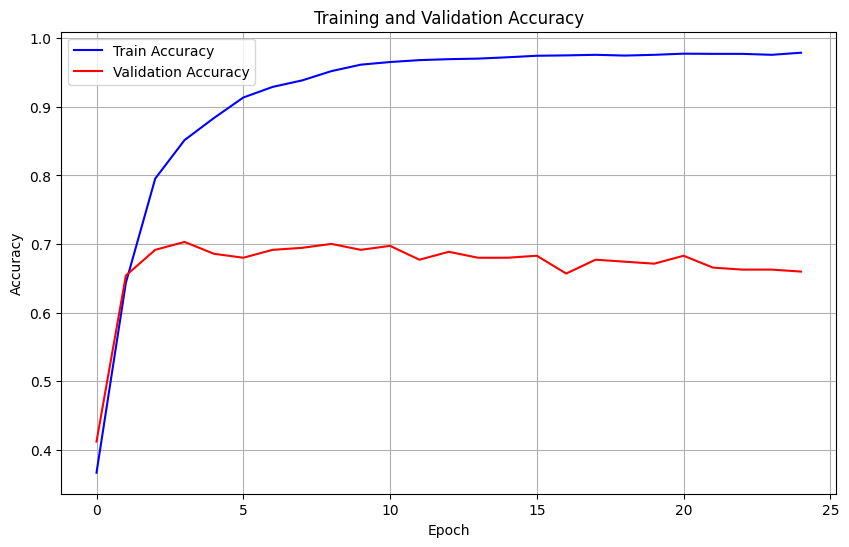

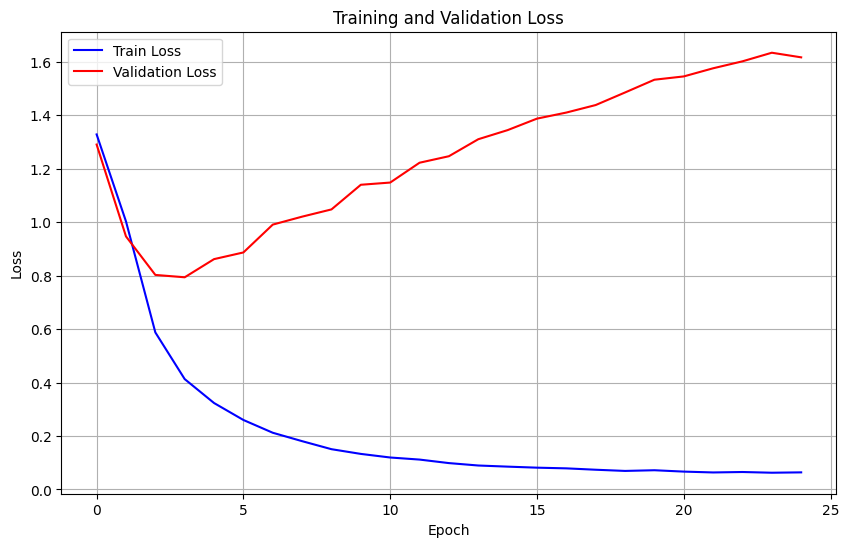

In [51]:
# Answer here
# Plot Training and Validation Accuracy
plt.figure(figsize=(10, 6))
plt.plot(training_log['epoch'], training_log['accuracy'], label='Train Accuracy', color='blue')
plt.plot(training_log['epoch'], training_log['val_accuracy'], label='Validation Accuracy', color='red')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()

# Plot Training and Validation Loss
plt.figure(figsize=(10, 6))
plt.plot(training_log['epoch'], training_log['loss'], label='Train Loss', color='blue')
plt.plot(training_log['epoch'], training_log['val_loss'], label='Validation Loss', color='red')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()

---

### Note

If you don't have a GPU (level is higher than GTX 1060) or you are not good at setting lots of things about computer, we recommend you to use the [kaggle kernel](https://www.kaggle.com/kernels) to do deep learning model training. They have already installed all the librarys and provided free GPU for you to use.

Note however that you will only be able to run a kernel for 6 hours. After 6 hours of inactivity, your Kaggle kernel will shut down (meaning if your model takes more than 6 hours to train, you can't train it at once).


### More Information for your reference

* Keras document: https://keras.io/
* Keras GitHub example: https://github.com/keras-team/keras/tree/master/examples
* CS229: Machine Learning: http://cs229.stanford.edu/syllabus.html
* Deep Learning cheatsheet: https://stanford.edu/~shervine/teaching/cs-229/cheatsheet-deep-learning
* If you want to try TensorFlow or PyTorch: https://pytorch.org/tutorials/
https://www.tensorflow.org/tutorials/quickstart/beginner

---
## 7. Word2Vector

We will introduce how to use `gensim` to train your word2vec model and how to load a pre-trained model.

https://radimrehurek.com/gensim/index.html

### 7.1 Prepare training corpus

In [52]:
## check library
import gensim

## ignore warnings
import warnings
warnings.filterwarnings('ignore')

# # if you want to see the training messages, you can use it
# import logging
# logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

## the input type
train_df['text_tokenized'] = train_df['text'].apply(lambda x: nltk.word_tokenize(x))
train_df[['id', 'text', 'text_tokenized']].head()

,id,text,text_tokenized
821,10821,GAMEDAY VS BUFORD TODAY AT 5:30 AT HOME!!!!!!!...,"[GAMEDAY, VS, BUFORD, TODAY, AT, 5:30, AT, HOM..."
1857,21000,"Everywhere I go, the air I breathe in tastes l...","[Everywhere, I, go, ,, the, air, I, breathe, i..."
2114,30110,"Always be #cheerful, #smile often make others ...","[Always, be, #, cheerful, ,, #, smile, often, ..."
1203,20346,@LBC - I can't read this article but headline ...,"[@, LBC, -, I, ca, n't, read, this, article, b..."
763,10763,Don't get #bitter get #BETTER,"[Do, n't, get, #, bitter, get, #, BETTER]"


In [53]:
## create the training corpus
training_corpus = train_df['text_tokenized'].values
training_corpus[:3]

array([list(['GAMEDAY', 'VS', 'BUFORD', 'TODAY', 'AT', '5:30', 'AT', 'HOME', '!', '!', '!', '!', '!', '!', '!', '!', '!', 'NEVER', 'BEEN', 'SO', 'EXCITED']),
       list(['Everywhere', 'I', 'go', ',', 'the', 'air', 'I', 'breathe', 'in', 'tastes', 'like', 'home', '.', "'", '-', '@', 'The_Currys', '#', 'restless']),
       list(['Always', 'be', '#', 'cheerful', ',', '#', 'smile', 'often', 'make', 'others', 'happy', ',', 'care', 'for', 'others', ',', 'help', 'who', 'feel', 'helpless', 'and', '#', 'vulnerable', '.', 'Life', 'feels', 'good', '#', 'leadership'])],
      dtype=object)

### 7.2 Training our model

You can try to train your own model. More details: https://radimrehurek.com/gensim/models/word2vec.html

In [54]:
from gensim.models import Word2Vec

## setting
vector_dim = 100
window_size = 5
min_count = 1
training_epochs = 20

## model
word2vec_model = Word2Vec(sentences=training_corpus,
                          vector_size=vector_dim, window=window_size,
                          min_count=min_count, epochs=training_epochs)

![Imgur](https://i.imgur.com/Fca3MCs.png)

### 7.3 Generating word vector (embeddings)

In [55]:
# get the corresponding vector of a word
word_vec = word2vec_model.wv['happy']
word_vec

array([ 0.18499938, -0.1190466 , -0.18034042,  0.27630058, -0.2236873 ,
       -0.6375148 ,  0.5966418 ,  1.2765418 , -0.46345952, -0.16910045,
       -0.43749854, -0.41412854, -0.25839368,  0.01366328, -0.14704369,
       -0.21105282,  0.6691929 , -0.38724262,  0.2640418 , -1.1347746 ,
        0.32763687,  0.9652535 ,  0.6829735 , -0.6643575 ,  0.18054515,
        0.19524303, -0.34149635,  0.06896415, -0.35853827,  0.13451473,
        0.3636043 ,  0.23018974,  0.6161839 , -0.55811256,  0.20641121,
        0.85603577,  0.05737358, -0.30431402, -0.48532206, -0.41110808,
        0.23019601, -0.1926583 , -0.352225  ,  0.13841683,  0.7689772 ,
       -0.38606453, -0.5789312 ,  0.23076105,  0.24309003,  0.29778796,
       -0.16394626, -0.802726  , -0.45156762,  0.48557052, -0.7187929 ,
       -0.33399457, -0.1134658 , -0.6176029 , -0.04026069, -0.01198705,
        0.26470706, -0.02413716,  0.72200257,  0.23787597, -0.7319193 ,
        0.7804668 , -0.25288588,  0.6886009 , -1.5248291 ,  0.77

In [56]:
# Get the most similar words
word = 'happy'
topn = 10
word2vec_model.wv.most_similar(word, topn=topn)

[('help', 0.9219709634780884),
 ('Be', 0.9169033169746399),
 ('smile', 0.9107681512832642),
 ('cats', 0.9088783860206604),
 ('Makes', 0.9053010940551758),
 ('O', 0.898334264755249),
 ('.\\nA', 0.8945772647857666),
 ('plz', 0.8940355181694031),
 ('dad', 0.8927613496780396),
 ('promise', 0.8925243020057678)]

### 7.4 Using a pre-trained w2v model

Instead of training your own model ,you can use a model that has already been trained. Here, we see 2 ways of doing that:


#### (1) Download model by yourself

source: [GoogleNews-vectors-negative300](https://code.google.com/archive/p/word2vec/)

more details: https://radimrehurek.com/gensim/models/keyedvectors.html

In [57]:
from gensim.models import KeyedVectors

## Note: this model is very huge, this will take some time ...
model_path = f"{didiersalazar_google_news_vectors_path}/GoogleNews-vectors-negative300.bin"
w2v_google_model = KeyedVectors.load_word2vec_format(model_path, binary=True)
print('load ok')

w2v_google_model.most_similar('happy', topn=10)

load ok


[('glad', 0.7408890724182129),
 ('pleased', 0.6632170677185059),
 ('ecstatic', 0.6626912355422974),
 ('overjoyed', 0.6599286794662476),
 ('thrilled', 0.6514049172401428),
 ('satisfied', 0.6437949538230896),
 ('proud', 0.636042058467865),
 ('delighted', 0.627237856388092),
 ('disappointed', 0.6269949674606323),
 ('excited', 0.6247665286064148)]

#### (2) Using gensim api

Other pretrained models are available here: https://github.com/RaRe-Technologies/gensim-data

In [58]:
import gensim.downloader as api

## If you see `SSL: CERTIFICATE_VERIFY_FAILED` error, use this:
import ssl
import urllib.request
ssl._create_default_https_context = ssl._create_unverified_context

glove_twitter_25_model = api.load("glove-twitter-25")
print('load ok')

glove_twitter_25_model.most_similar('happy', topn=10)

[==================================================] 100.0% 104.8/104.8MB downloaded
load ok


[('birthday', 0.9577818512916565),
 ('thank', 0.937666654586792),
 ('welcome', 0.93361496925354),
 ('love', 0.9176183342933655),
 ('miss', 0.9164500832557678),
 ('hello', 0.9158351421356201),
 ('thanks', 0.915008544921875),
 ('merry', 0.9053249359130859),
 ('bless', 0.902732253074646),
 ('wish', 0.9013164043426514)]

### 7.5 king + woman - man = ?

Let's run one of the most famous examples for Word2Vec and compute the similarity between these 3 words:

In [59]:
w2v_google_model.most_similar(positive=['king', 'woman'], negative=['man'])

[('queen', 0.7118193507194519),
 ('monarch', 0.6189674139022827),
 ('princess', 0.5902431011199951),
 ('crown_prince', 0.5499460697174072),
 ('prince', 0.5377321839332581),
 ('kings', 0.5236844420433044),
 ('Queen_Consort', 0.5235945582389832),
 ('queens', 0.5181134343147278),
 ('sultan', 0.5098593831062317),
 ('monarchy', 0.5087411999702454)]

---
### ** >>> Exercise 7 (Take home): **  

Now, we have the word vectors, but our input data is a sequence of words (or say sentence).
How can we utilize these "word" vectors to represent the sentence data and train our model?


In [60]:
#Weighted Averaging Using TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer

# Compute TF-IDF
tfidf_vectorizer = TfidfVectorizer()
tfidf_vectorizer.fit(train_df['text'])
word_to_tfidf = dict(zip(tfidf_vectorizer.get_feature_names_out(), tfidf_vectorizer.idf_))

def sentence_to_weighted_vector(sentence, model, word_to_tfidf, vector_dim):
    """
    Converts a sentence into a fixed-length vector using TF-IDF weighting.
    """
    word_vectors = []
    weights = []
    for word in sentence:
        if word in model.wv and word in word_to_tfidf:
            word_vectors.append(model.wv[word])
            weights.append(word_to_tfidf[word])
    if len(word_vectors) > 0:
        return np.average(word_vectors, axis=0, weights=weights)
    else:
        return np.zeros(vector_dim)

# Example: Convert the training data into weighted sentence embeddings
X_train_weighted_vectors = np.array([
    sentence_to_weighted_vector(sentence, word2vec_model, word_to_tfidf, vector_dim)
    for sentence in training_corpus
])

print("Shape of weighted training sentence embeddings:", X_train_weighted_vectors.shape)


Shape of weighted training sentence embeddings: (3613, 100)


We can utilize these "word“ vectors in multiple ways, one way is to use the term importance from TF-IDF to weigh each word's vector before averaging. We could also concatenate word vectors for all words in the sentence up to a fixed length. This method preserves word order and is often used with deep learning models. The Averaging Word Vectors is simple and efficient for small datasets.The Weighted Averaging with TF-IDF adds importance to words based on their relevance, improving results for tasks like classification. Concatenation is useful for sequence models like LSTMs, GRUs, or CNNs.


## 8. Clustering: k-means

Here we introduce how to use `sklearn` to do the basic **unsupervised learning** approach, k-means.    

more details: http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html


#### Basic concept

![Image](https://i.imgur.com/PEdUf54.png)

(img source: https://towardsdatascience.com/k-means-clustering-identifying-f-r-i-e-n-d-s-in-the-world-of-strangers-695537505d)

In [62]:
# clustering target
target_list = ['happy', 'fear', 'angry', 'car', 'teacher', 'computer']
print('target words: ', target_list)

# convert to word vector
X = [word2vec_model.wv[word] for word in target_list]

target words:  ['happy', 'fear', 'angry', 'car', 'teacher', 'computer']


In [63]:
from sklearn.cluster import KMeans

# we have to decide how many cluster (k) we want
k = 2

# k-means model
kmeans_model = KMeans(n_clusters=k)
kmeans_model.fit(X)

# cluster result
cluster_result = kmeans_model.labels_

# show
for i in range(len(target_list)):
    print('word: {} \t cluster: {}'.format(target_list[i], cluster_result[i]))

Exception ignored on calling ctypes callback function: <function ThreadpoolController._find_libraries_with_dl_iterate_phdr.<locals>.match_library_callback at 0x7b546b796830>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/threadpoolctl.py", line 1005, in match_library_callback
    self._make_controller_from_path(filepath)
  File "/usr/local/lib/python3.10/dist-packages/threadpoolctl.py", line 1175, in _make_controller_from_path
    lib_controller = controller_class(
  File "/usr/local/lib/python3.10/dist-packages/threadpoolctl.py", line 114, in __init__
    self.dynlib = ctypes.CDLL(filepath, mode=_RTLD_NOLOAD)
  File "/usr/lib/python3.10/ctypes/__init__.py", line 374, in __init__
    self._handle = _dlopen(self._name, mode)
OSError: dlopen() error


word: happy 	 cluster: 0
word: fear 	 cluster: 0
word: angry 	 cluster: 0
word: car 	 cluster: 1
word: teacher 	 cluster: 1
word: computer 	 cluster: 1


![pic6.png](https://github.com/didiersalazar/DM2024-Lab2-Master/blob/main/pics/pic6.png?raw=true)

In [64]:
#check cluster membership
word = 'student'
word_vec = word2vec_model.wv[word]
kmeans_model.predict([word_vec])

array([1], dtype=int32)

In [65]:
#check cluster membership
word = 'sad'
word_vec = word2vec_model.wv[word]
kmeans_model.predict([word_vec])

array([0], dtype=int32)


## 9. High-dimension Visualization: t-SNE and UMAP

No matter if you use the Bag-of-words, TF-IDF, or Word2Vec, it's very hard to see the embedding result, because the dimension is larger than 3.  

In Lab 1, we already talked about PCA, t-SNE and UMAP. We can use PCA to reduce the dimension of our data, then visualize it. However, if you dig deeper into the result, you'd find it is insufficient.

Our aim will be to create a visualization similar to the one below with t-SNE:

![pic7.png](https://github.com/didiersalazar/DM2024-Lab2-Master/blob/main/pics/pic7.png?raw=true)
source: https://www.fabian-keller.de/research/high-dimensional-data-visualization

And also like this for UMAP:

![pic9.png](https://github.com/didiersalazar/DM2024-Lab2-Master/blob/main/pics/pic9.png?raw=true)

source: https://umap-learn.readthedocs.io/en/latest/auto_examples/plot_mnist_example.html

t-SNE and UMAP reference:  
http://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html
https://umap-learn.readthedocs.io/en/latest/

### 9.1 Prepare visualizing target

Let's prepare data lists like:
- happy words
- angry words
- data words
- mining words

In [66]:
word_list = ['happy', 'angry', 'data', 'mining']

topn = 5
happy_words = ['happy'] + [word_ for word_, sim_ in w2v_google_model.most_similar('happy', topn=topn)]
angry_words = ['angry'] + [word_ for word_, sim_ in w2v_google_model.most_similar('angry', topn=topn)]
data_words = ['data'] + [word_ for word_, sim_ in w2v_google_model.most_similar('data', topn=topn)]
mining_words = ['mining'] + [word_ for word_, sim_ in w2v_google_model.most_similar('mining', topn=topn)]

print('happy_words: ', happy_words)
print('angry_words: ', angry_words)
print('data_words: ', data_words)
print('mining_words: ', mining_words)

target_words = happy_words + angry_words + data_words + mining_words
print('\ntarget words: ')
print(target_words)

print('\ncolor list:')
cn = topn + 1
color = ['b'] * cn + ['g'] * cn + ['r'] * cn + ['y'] * cn
print(color)

happy_words:  ['happy', 'glad', 'pleased', 'ecstatic', 'overjoyed', 'thrilled']
angry_words:  ['angry', 'irate', 'enraged', 'indignant', 'incensed', 'annoyed']
data_words:  ['data', 'Data', 'datasets', 'dataset', 'databases', 'statistics']
mining_words:  ['mining', 'Mining', 'mines', 'coal_mining', 'mine', 'miner']

target words: 
['happy', 'glad', 'pleased', 'ecstatic', 'overjoyed', 'thrilled', 'angry', 'irate', 'enraged', 'indignant', 'incensed', 'annoyed', 'data', 'Data', 'datasets', 'dataset', 'databases', 'statistics', 'mining', 'Mining', 'mines', 'coal_mining', 'mine', 'miner']

color list:
['b', 'b', 'b', 'b', 'b', 'b', 'g', 'g', 'g', 'g', 'g', 'g', 'r', 'r', 'r', 'r', 'r', 'r', 'y', 'y', 'y', 'y', 'y', 'y']


### 9.2 Plot using t-SNE and UMAP (2-dimension)

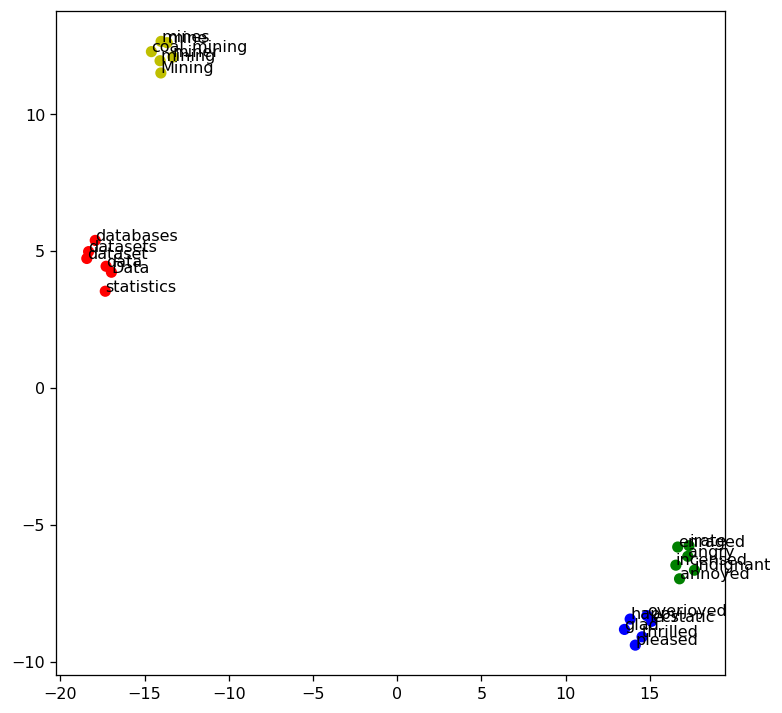

In [67]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

## w2v model
model = w2v_google_model

## prepare training word vectors
size = 200
target_size = len(target_words)
all_word = list(model.index_to_key)
word_train = target_words + all_word[:size]
X_train = model[word_train]

## t-SNE model
tsne = TSNE(n_components=2, metric='cosine', random_state=28)

## training
X_tsne = tsne.fit_transform(X_train)

## plot the result
plt.figure(figsize=(7.5, 7.5), dpi=115)
plt.scatter(X_tsne[:target_size, 0], X_tsne[:target_size, 1], c=color)
for label, x, y in zip(target_words, X_tsne[:target_size, 0], X_tsne[:target_size, 1]):
    plt.annotate(label, xy=(x,y), xytext=(0,0),  textcoords='offset points')
plt.show()

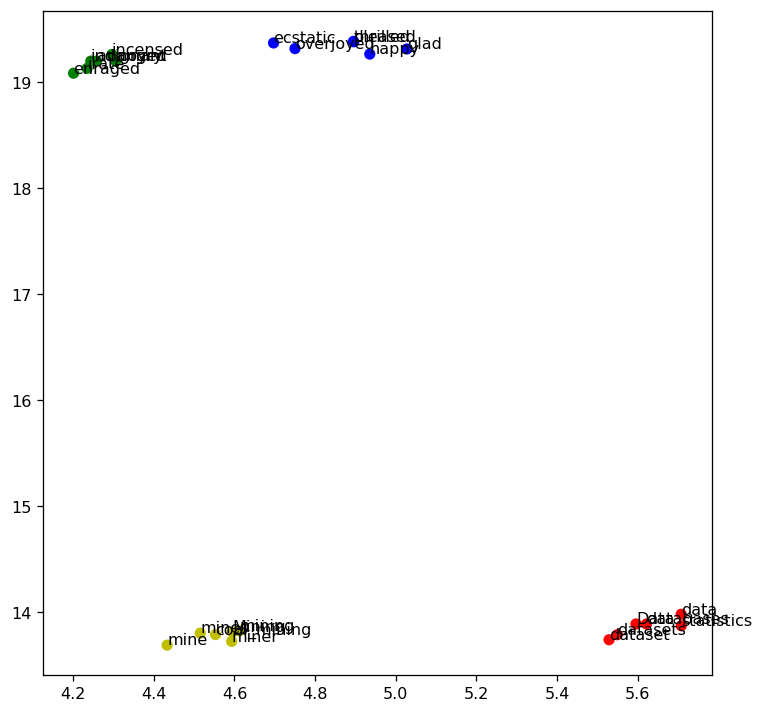

In [68]:
import matplotlib.pyplot as plt
import umap.umap_ as umap

## w2v model
model = w2v_google_model

## prepare training word vectors
size = 200
target_size = len(target_words)
all_word = list(model.index_to_key)
word_train = target_words + all_word[:size]
X_train = model[word_train]

## UMAP model
umap_model = umap.UMAP(n_components=2, metric='cosine', random_state=28)

## training
X_umap = umap_model.fit_transform(X_train)

## plot the result
plt.figure(figsize=(7.5, 7.5), dpi=115)
plt.scatter(X_umap[:target_size, 0], X_umap[:target_size, 1], c=color)
for label, x, y in zip(target_words, X_umap[:target_size, 0], X_umap[:target_size, 1]):
    plt.annotate(label, xy=(x,y), xytext=(0,0),  textcoords='offset points')
plt.show()



### ** >>> Exercise 8 (Take home): **  

Generate a t-SNE and UMAP visualization to show the 15 words most related to the words "angry", "happy", "sad", "fear" (60 words total). Compare the differences between both graphs.

The two graphs represent different conceptions and applications in machine learning: the first graph shows training versus validation loss over epochs during model training, focusing on how well a model fits to the data. The second graph is a UMAP of word embeddings that highlights semantic relationships based on the proximity of words in a reduced-dimensional space.

The first graph emphasizes the temporal evolution of loss values during training, showing the insights into overfitting and underfitting. Its purpose is diagnostic, helping to optimize model performance. On the other hand, the second graph visualizes static word embedding representations in a semantic space. Here, words with similar meanings are grouped together, such as clusters for happiness, sadness, anger, or fear, showing how the embedding model encodes relationships in the data. While the first graph looks at a model's training process, the second provides insight into the relationships learned by a model's embedding layer. Both serve different yet complementary purposes in understanding and refining machine learning models.

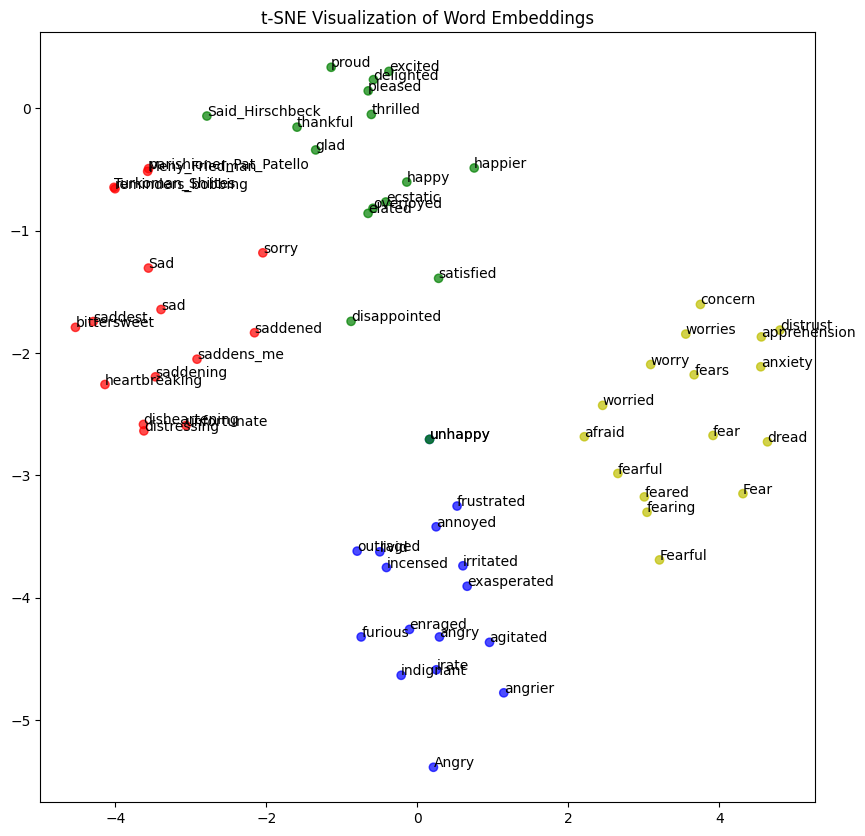

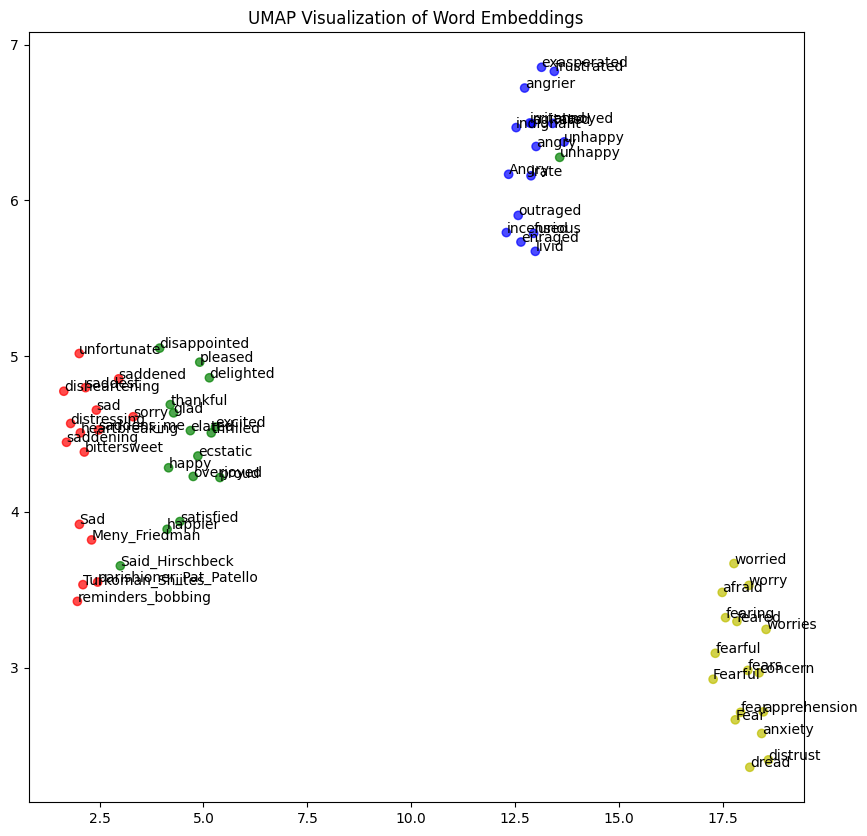

In [69]:
import numpy as np
from sklearn.manifold import TSNE
import umap.umap_ as umap
import matplotlib.pyplot as plt

# Generate target words
word_list = ["angry", "happy", "sad", "fear"]
topn = 15  # Number of most related words
target_words = []

# Fetch related words for each target word
for word in word_list:
    related_words = [word] + [w for w, sim in w2v_google_model.most_similar(word, topn=topn)]
    target_words.extend(related_words)

# Prepare colors for visualization
color_map = ['b'] * (topn + 1) + ['g'] * (topn + 1) + ['r'] * (topn + 1) + ['y'] * (topn + 1)

# Extract vectors for target words and convert to numpy array
target_vectors = np.array([w2v_google_model[word] for word in target_words if word in w2v_google_model])

# t-SNE Visualization
tsne_model = TSNE(n_components=2, metric='cosine', random_state=42)
X_tsne = tsne_model.fit_transform(target_vectors)

plt.figure(figsize=(10, 10))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=color_map, alpha=0.7)
for label, x, y in zip(target_words, X_tsne[:, 0], X_tsne[:, 1]):
    plt.annotate(label, xy=(x, y), xytext=(0, 0), textcoords="offset points")
plt.title("t-SNE Visualization of Word Embeddings")
plt.show()

# UMAP Visualization
umap_model = umap.UMAP(n_components=2, metric='cosine', random_state=42)
X_umap = umap_model.fit_transform(target_vectors)

plt.figure(figsize=(10, 10))
plt.scatter(X_umap[:, 0], X_umap[:, 1], c=color_map, alpha=0.7)
for label, x, y in zip(target_words, X_umap[:, 0], X_umap[:, 1]):
    plt.annotate(label, xy=(x, y), xytext=(0, 0), textcoords="offset points")
plt.title("UMAP Visualization of Word Embeddings")
plt.show()


## 10. Large Language Models (LLMs)
Large Language Models (LLMs) are AI models trained on vast text data to understand and generate human language. Models like GPT and BERT excel at tasks like translation, summarization, and sentiment analysis due to their deep learning techniques and large-scale training. Recently these models got popular with the rise of Open-AI's ChatGPT and their different models, showcasing the potential of these models in a lot of aspects of our current society.

Open-source LLMs are cost-effective and customizable, with strong community support, but may underperform compared to paid models and require technical expertise to manage. Paid LLMs offer superior performance, ease of use, and regular updates, but are costly, less flexible, and create dependency on external providers for ongoing access and updates.

#### Open Source LLMs:
In this lab we are going to use Ollama ([Ollama GitHub Link](https://github.com/ollama/ollama)), that is a library that let us use a long list of open-source LLMs of differing size. For this section we are going to be using **'llama3.2'** or **'llama3.2:1b'** for **text based tasks**, and **'llava-phi3'** for **multi-modal tasks** (e.g. image to text). Ollama has a great variety of models, and those can be found here: [model library](https://ollama.com/library). You are free to explore them if you want to try using them, you can check the advantages and disadvantages of each.

Or they can also be observed in here:

![pic10.png](https://github.com/didiersalazar/DM2024-Lab2-Master/blob/main/pics/pic10.png?raw=true)


In the previous image we can observe that all LLMs have something called parameters, these are the internal weights that the model learns during training, helping it understand and generate language. The more a model has, the more complex and accurate it can be, but it also needs more memory to run.

For example:

Models with **7 billion parameters** need at least **8 GB of VRAM**.
**13 billion parameters** require **16 GB of VRAM**.
**33 billion parameters** need **32 GB of VRAM**.
The higher the number of parameters, the more memory and computational power the model needs to function efficiently.

And so that is why we are trying to use small LLMs for this practice, because they require a lot of computational resources, so by using 'llama3.2' and 'llava-phi3', both models with 3 billion parameters, we will only use at most 8 GB of VRAM. But if there are some issues with 'llama3.2' we can still use 'llama3.2:1b' the model with 1 billion parameters that requires less resources.

So now let's talk about the models:
**LLaMA 3.2** is part of the LLaMA series (Large Language Model Meta AI), designed to provide efficient language understanding and generation. Despite having fewer parameters than some larger models, it offers strong performance in NLP tasks, making it suitable for scenarios where both accuracy and resource efficiency are important.

**LLaVA** (Large Language and Vision Assistant) models, like **LLaVA-Phi3** are multimodal models combining language and vision capabilities. It can interpret visual inputs like images and generate corresponding text, making it ideal for tasks that require both visual understanding and language generation, such as image captioning and answering visual-based questions.

**I will be using the llama3.2 model going onwards, you can change it for the smallest version if it is necessary for you, or you can try to run it on Kaggle where you can use online GPU resources for it.**

### 10.1 Text Prompting
Like with ChatGPT we can use these models to ask about anything. Here we are going to ask a question and then ask it to return it in markdown format to make it look better afterwards.

In [70]:
import ollama
response = ollama.chat(model='llama3.2', messages=[
    {
        'role': 'user',
        'content': 'What is data mining? (in markdown format)'
    },
])

print(response['message']['content'])

**Data Mining**

### Definition

Data mining is the process of automatically discovering patterns, relationships, and insights from large datasets. It involves using various techniques to extract useful knowledge or information from existing data.

### Types of Data Mining

#### 1. **Supervised Learning**

*   Involves training models on labeled data.
*   Goal is to predict outcomes based on input features.
*   Example: Image classification, sentiment analysis.

#### 2. **Unsupervised Learning**

*   Involves discovering patterns in unlabeled data.
*   Goal is to identify clusters, anomalies, or outliers.
*   Example: Customer segmentation, gene expression analysis.

#### 3. **Semi-Supervised Learning**

*   Combines supervised and unsupervised learning techniques.
*   Involves using labeled data to improve model performance on unlabeled data.
*   Example: Sentiment analysis with labeled text data and unlabeled text data.

### Data Mining Techniques

#### 1. **Association Rule Mining**

**We can use the IPython library to make the response look better:**

In [71]:
from IPython.display import display, Markdown, Latex
display(Markdown('*some markdown* $\phi$'))

*some markdown* $\phi$

In [72]:
display(Markdown(response['message']['content']))

**Data Mining**
================

### Definition

Data mining is the process of automatically discovering patterns, relationships, and insights from large datasets. It involves using various techniques to extract useful knowledge or information from existing data.

### Types of Data Mining

#### 1. **Supervised Learning**

*   Involves training models on labeled data.
*   Goal is to predict outcomes based on input features.
*   Example: Image classification, sentiment analysis.

#### 2. **Unsupervised Learning**

*   Involves discovering patterns in unlabeled data.
*   Goal is to identify clusters, anomalies, or outliers.
*   Example: Customer segmentation, gene expression analysis.

#### 3. **Semi-Supervised Learning**

*   Combines supervised and unsupervised learning techniques.
*   Involves using labeled data to improve model performance on unlabeled data.
*   Example: Sentiment analysis with labeled text data and unlabeled text data.

### Data Mining Techniques

#### 1. **Association Rule Mining**

*   Identifies relationships between items in a dataset.
*   Example: Product recommendations, purchase history analysis.

#### 2. **Clustering**

*   Groups similar data points together based on their characteristics.
*   Example: Customer segmentation, gene expression clustering.

#### 3. **Regression Analysis**

*   Predicts continuous outcomes based on input features.
*   Example: Stock prices prediction, energy consumption forecasting.

### Data Mining Applications

#### 1. **Marketing and Sales**

*   Customer profiling, product recommendation, target audience analysis.

#### 2. **Healthcare**

*   Disease diagnosis, patient segmentation, medical imaging analysis.

#### 3. **Finance**

*   Stock market prediction, risk analysis, portfolio optimization.

### Challenges in Data Mining

#### 1. **Data Quality Issues**

*   Handling missing values, data normalization, data cleaning.

#### 2. **Scalability and Performance**

*   Optimizing model performance for large datasets.
*   Choosing the right algorithm for the task at hand.

#### 3. **Interpreting Results**

*   Understanding the insights gained from data mining models.
*   Communicating results to stakeholders effectively.

### Conclusion

Data mining is a powerful tool for extracting valuable insights from large datasets. By applying various techniques and algorithms, organizations can gain a competitive edge in their respective industries. However, it requires careful consideration of challenges such as data quality issues, scalability, and interpretation of results.


### ** >>> Exercise 9 (Take home): **  

You noticed there is a **role** parameter inside the ollama.chat function, investigate what other roles there can be inside the function and what do they do. Give an example of a prompt using another role in additional to the **user** one.

In [73]:
# Answer here
import ollama
from IPython.display import display, Markdown

# Example with 'system' and 'user' roles
response = ollama.chat(model='llama3.2', messages=[
    {
        'role': 'system',
        'content': 'You are an expert data scientist explaining concepts to beginners in simple terms.'
    },
    {
        'role': 'user',
        'content': 'Can you explain what overfitting is in machine learning?'
    },
])

# Display response in markdown format
display(Markdown(response['message']['content']))

Overfitting! It's a common problem that many machine learners struggle with, but don't worry, I'm here to break it down for you.

**What is Overfitting?**

Imagine you're trying to draw a picture of your favorite animal. If you know exactly how the animal looks and you have an incredible amount of time to study its features, you can create an incredibly accurate drawing that perfectly captures every detail.

However, if you only look at pictures of animals taken by the same photographer with the same camera settings, your drawing might become too detailed and start to resemble those exact photos. You've "overfit" the drawing to a specific set of examples, rather than trying to capture the general characteristics of all animals.

In machine learning, overfitting is similar. When a model is trained on a dataset with a small number of examples, it can become too specialized and start to fit the noise (random fluctuations) in the data rather than the underlying patterns. This means that the model performs well on the training data, but poorly on new, unseen data.

**Why does Overfitting Happen?**

Overfitting occurs when a model has:

1. **Too many parameters**: The model is trying to learn too much from the training data, which can lead to fitting the noise.
2. **Insufficient regularization**: The model doesn't have enough constraints to prevent it from overfitting.
3. **Small dataset size**: The model is learning from a limited number of examples, making it more prone to overfitting.

**How Can We Prevent Overfitting?**

Don't worry; there are ways to prevent or mitigate overfitting!

1. **Regularization techniques**: Add constraints to the model to prevent it from overfitting, such as L1 and L2 regularization (e.g., dropout, early stopping).
2. **Data augmentation**: Increase the size of the training dataset by artificially generating new examples.
3. **Cross-validation**: Split the data into multiple folds and train a model on each fold separately.
4. **Model selection**: Use techniques like cross-validation to choose the best model that generalizes well.

Now, you might be thinking, "But what about underfitting?" Don't worry; I'll cover that next!

In the ollama.chat function, the role parameter helps define the context of the interaction. It typically determines the participant's role in the conversation, such as user, assistant, or sometimes other custom roles.

Some other common role values are user, which represents the person asking the questions or providing input, it provides questions, instructions, or tasks for the assistant. An example is'content': 'What is data mining?'. Another common role is assistant, which represents the AI responding to the user, this role is typically handled by the model itself, responding to the user's queries based on the prior system and user inputs. An example is 'content': 'Data mining is the process of discovering patterns and insights from large datasets.'

### 10.2 Multi-Modal Prompting - Text + Images
Multi-modal prompting involves using input from multiple sources or modes, such as text, images, or audio, to guide a model's response. It allows AI to process and generate information based on more than one type of input.

For image plus text prompting, the model receives both an image and a related text prompt. The image provides visual context, while the text gives additional guidance. The model uses both inputs to generate more accurate and contextually relevant responses, which is useful for tasks like image captioning, visual question answering, or content generation based on visual cues.

Let's look at the following images that are in the **pics** folder in the directory of this notebook:

![example1.png](https://github.com/didiersalazar/DM2024-Lab2-Master/blob/main/pics/example1.png?raw=true)

source: https://cooljapan-videos.com/tw/articles/epe0y86g

![example2.png](https://github.com/didiersalazar/DM2024-Lab2-Master/blob/main/pics/example2.jpg?raw=true)

source: https://www.istockphoto.com/photo/young-cat-scottish-straight-gm1098182434-294927481

We will use the **llava-phi3** model that we installed to request a description of the images:

In [74]:
import ollama
response2 = ollama.chat(model='llava-phi3', messages=[
    {
        'role': 'user',
        'content': 'What is this image about?',
        'images': [f'{didiersalazar_pictures_path}/pics/example1.png'] #Image with the dog
    },
])

display(Markdown(response2['message']['content']))

In the center of a grassy lawn, a small Shiba Inu dog with orange and white fur is captured in mid-air. The dog's paws are off the ground, suggesting it has launched itself into flight from its hind legs. Its front paws are stretched out to the sides, adding balance to its aerial maneuver. The dog's tail is up in a classic "flying" position, and its mouth is open, possibly yipping at an unseen object or simply enjoying its moment of freedom.

The background of the image features a white fence that borders the lawn. Beyond the fence, there are trees and bushes, providing a serene backdrop to this playful scene. The dog's position in relation to these objects suggests it has plenty of space to run and jump.

Overall, this image captures a moment of joy and freedom for a small Shiba Inu on its grassy lawn.

In [75]:
response3 = ollama.chat(model='llava-phi3', messages=[
    {
        'role': 'user',
        'content': 'What is this image about?',
        'images': [f'{didiersalazar_pictures_path}/pics/example2.jpg'] #Image with the cat
    },
])

display(Markdown(response3['message']['content']))

In the center of a white background, a tabby cat with brown and black stripes stands alert. Its tail is raised high in the air, and its ears are perked up, indicating curiosity or interest. The cat's eyes are focused on something off to the right, suggesting it might be watching something not visible in the frame. The image captures a moment of quiet anticipation as the cat observes its surroundings.


### ** >>> Exercise 10 (Take home): **  

Try asking the model with one image of your choosing. Is the description accurate? Why?

In [77]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


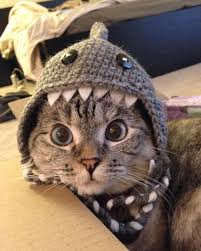

In [80]:
import ollama
# Use the uploaded cat image
response =  ollama.chat(model='llava-phi3', messages=[
    {
        'role': 'user',
        'content': 'What is this image about?',
        'images': ['/content/cat.jpg']  # Replace with the actual path
    },
])

# Display the response
display(Markdown(response['message']['content']))


The image features a gray tabby cat with striking green eyes. The cat's head is positioned on its front paws, and it gazes directly into the camera with an air of curiosity. Adding to its adorable appearance is a handmade beanie hat that sits snugly on its head. The beanie is gray and intricately designed, featuring two ear-like protrusions at the top reminiscent of cat ears, giving it a playful touch.

The background provides context to the setting - it appears to be a table or desk scattered with various objects. A yellow sweater can be seen in the vicinity, suggesting a cozy and comfortable environment for the feline. The precise arrangement of these objects is not clearly visible, but their presence contributes to the overall narrative of a domestic scene where pets are part of daily life.

The image does not contain any text or indicate any specific actions being performed by the cat. The relative positions of the objects suggest that they were casually placed on the table or desk, possibly during everyday use. The focus remains on the cat and its endearing beanie hat, capturing a moment of feline charm in a familiar setting.

The description provided is not accurate for the image of the cat. The hat described as "a knit hat shaped like a turtle shell" is actually a shark-shaped hat, complete with fins and teeth. The cat in the image does not have striking blue eyes as mentioned, but large, round ones. Additionally, there is no "necklace made of small pearls" visible in the image. The background is described as having "clothes hanging neatly on a rack," but in reality, it features a casual and slightly disorganized setting with furniture and textiles. Overall, the description attempts to create a playful and orderly scene but fails to capture the humorous and quirky nature of the actual image, highlighting a clear mismatch in visual details and context.

### 10.3 Retrieval-Augmented Generation (RAG)
RAG (Retrieval-Augmented Generation) is a technique where a language model combines document retrieval with text generation. In RAG, a retrieval system first finds relevant documents or text chunks, and then the language model uses this retrieved information to generate a more informed and accurate response. This method enhances the model's ability to answer questions by grounding its responses in real, external data.

In the following code, we will load a webpage as a document, which allows us to retrieve text from a URL. After loading the content, we will split the document into smaller, manageable chunks, making it easier for our model to process. Then, we'll generate embeddings for these chunks with a specified LLM model (e.g., Llama3.2). These embeddings will be stored in a vector database, which enables us to perform similarity searches. By setting up this retrieval system, we can use a RAG chain to answer questions. The retriever finds relevant text chunks from the document based on a query, and the LLM generates a response by incorporating this retrieved information, making the answers more grounded and accurate.

In [81]:
import ollama
import bs4
from langchain.text_splitter import RecursiveCharacterTextSplitter
from langchain_community.document_loaders import WebBaseLoader
from langchain_community.vectorstores import Chroma
from langchain_community.embeddings import OllamaEmbeddings
from langchain_core.output_parsers import StrOutputParser
from langchain_core.runnables import RunnablePassthrough

llm_model = "llama3.2" #You can change to the one of your preference

# Function to load, split, and retrieve documents
def load_and_retrieve_docs(url):
    loader = WebBaseLoader(
        web_paths=(url,),
        bs_kwargs=dict()
    )
    docs = loader.load() #We will load the URL that will serve as our data source
    text_splitter = RecursiveCharacterTextSplitter(chunk_size=1000, chunk_overlap=200) #We will divide the URL in chunks of text for easier comparison in the vector space
    splits = text_splitter.split_documents(docs)
    #print(splits) #You can print this to see how the chunks in the url where split
    embeddings = OllamaEmbeddings(model=llm_model) #Generating embeddings with our chosen model
    vectorstore = Chroma.from_documents(documents=splits, embedding=embeddings) #Our vector space for comparison
    return vectorstore.as_retriever()

url="https://www.ibm.com/topics/large-language-models"
# Create the retriever
retriever = load_and_retrieve_docs(url)

def format_docs(docs):
    return "\n\n".join(doc.page_content for doc in docs) #Format the retrieved docs in an orderly manner for prompting

# Define the Ollama LLM function
def ollama_llm(question, context):
    formatted_prompt = f"Question: {question}\n\nContext: {context}"
    response = ollama.chat(model='llama3.2', messages=[{'role': 'user', 'content': formatted_prompt}])
    return response['message']['content']

# Define the RAG chain
def rag_chain(question):
    retrieved_docs = retriever.invoke(question)
    formatted_context = format_docs(retrieved_docs)
    return ollama_llm(question, formatted_context)

# Use the RAG chain
result = rag_chain("What are the related solutions of IBM with LLMs?")
display(Markdown(result))

IBM has developed several related solutions with Large Language Models (LLMs), including:

1. Watsonx: A cloud-based platform that provides a generative AI backbone for various IBM products, such as Watson Assistant and Watson Orchestrate.
2. Granite model series: A line of models launched on watsonx.ai, which serves as the foundation for other AI applications and enables the generation of coherent and contextually relevant responses.
3. Watson Assistant: A cloud-based AI service that utilizes LLMs to power conversational interfaces and provide 24/7 customer support.
4. Watson Orchestrate: An AI-powered platform that leverages LLMs to automate business processes, improve efficiency, and enhance decision-making.

These solutions demonstrate IBM's commitment to integrating LLMs into its broader portfolio of artificial intelligence offerings, aiming to drive innovation, improve customer experiences, and streamline business operations.


### **Actual content in the URL:**
![pic11.png](https://github.com/didiersalazar/DM2024-Lab2-Master/blob/main/pics/pic11.png?raw=true)

source: https://www.ibm.com/topics/large-language-models


### ** >>> Exercise 11 (Take home): **  

Try to modify the code to make it accept **three URLs**, or **three text documents** of your choosing. After modifying it, make **three prompts/questions** with information that can be found in each of the documents/urls, **compare the accuracy of the response** with the actual answer. Investigate and discuss the advantages and disadvantages of RAG systems.

In [90]:
import ollama
import bs4
from langchain.text_splitter import RecursiveCharacterTextSplitter
from langchain_community.document_loaders import WebBaseLoader
from langchain_community.vectorstores import Chroma
from langchain_community.embeddings import OllamaEmbeddings
from langchain_core.output_parsers import StrOutputParser
from langchain_core.runnables import RunnablePassthrough
from IPython.display import display, Markdown

llm_model = "llama3.2"

# Function to load, split, and retrieve documents from multiple URLs
def load_and_retrieve_docs_multiple(urls):
    docs = []
    for url in urls:
        loader = WebBaseLoader(web_paths=(url,), bs_kwargs=dict())
        docs.extend(loader.load())  # Load all content from the given URLs
    text_splitter = RecursiveCharacterTextSplitter(chunk_size=1000, chunk_overlap=200)
    splits = text_splitter.split_documents(docs)  # Split the documents into chunks
    embeddings = OllamaEmbeddings(model=llm_model)  # Generate embeddings
    vectorstore = Chroma.from_documents(documents=splits, embedding=embeddings)  # Store embeddings in vector space
    return vectorstore.as_retriever()

# List of URLs or documents
urls = [
    "https://www.ibm.com/topics/large-language-models",
    "https://en.wikipedia.org/wiki/Retrieval-augmented_generation",
    "https://www.microsoft.com/en-us/ai/ai-platform"
]

# Create the retriever
retriever = load_and_retrieve_docs_multiple(urls)

def format_docs(docs):
    return "\n\n".join(doc.page_content for doc in docs)

# Define the Ollama LLM function
def ollama_llm(question, context):
    formatted_prompt = f"Question: {question}\n\nContext: {context}"
    response = ollama.chat(model=llm_model, messages=[{'role': 'user', 'content': formatted_prompt}])
    return response['message']['content']

# Define the RAG chain
def rag_chain(question):
    retrieved_docs = retriever.invoke(question)  # Retrieve relevant chunks for the question
    formatted_context = format_docs(retrieved_docs)
    return ollama_llm(question, formatted_context)

# Test the RAG system with three questions
questions = [
    "What are the related solutions of IBM with LLMs?",
    "What is Retrieval-Augmented Generation (RAG) used for?",
    "How does Microsoft's AI platform integrate with LLMs?"
]

# Evaluate responses
for question in questions:
    print(f"**Question:** {question}\n")
    result = rag_chain(question)
    display(Markdown(result))

**Question:** What are the related solutions of IBM with LLMs?



IBM has launched several related solutions with LLMs, including:

1. Watsonx.ai: A platform that hosts IBM's Granite model series, which serves as the generative AI backbone for other IBM products like watsonx Assistant and watsonx Orchestrate.
2. Watsonx Assistant: A conversational AI solution that utilizes IBM's LLM technology to provide human-like assistance to customers.
3. Watsonx Orchestrate: An integration platform that allows developers to build custom applications using IBM's LLM-powered capabilities.

These solutions demonstrate IBM's commitment to leveraging LLMs to enhance its natural language understanding (NLU) and natural language processing (NLP) capabilities, and to provide innovative AI-powered experiences for its customers.

**Question:** What is Retrieval-Augmented Generation (RAG) used for?



According to the provided text, Retrieval-Augmented Generation (RAG) is used for generating mid-to-long form content in response to prompts, such as writing emails, blog posts, or other content that requires refinement and polishing.

**Question:** How does Microsoft's AI platform integrate with LLMs?



Microsoft's AI platform integrates with LLMs by leveraging their capabilities to provide a range of applications and use cases. Here are some possible ways Microsoft's AI platform might integrate with LLMs:

1. **Conversational interfaces**: Microsoft's AI platform can utilize LLMs to power conversational interfaces, such as chatbots or voice assistants, that can understand and respond to user queries in a human-like manner.
2. **Text generation**: The platform can tap into LLMs' ability to generate coherent and contextually relevant text, enabling features like content suggestions, article ideas, or even entire articles.
3. **Content analysis and recommendation**: By integrating with LLMs, Microsoft's AI platform can analyze large amounts of content and provide recommendations for users based on their interests, preferences, and behavior.
4. **Language translation and localization**: The platform can leverage LLMs' capabilities in language translation and localization to enable seamless communication across languages and cultures.
5. **Content creation tools**: Microsoft's AI platform can incorporate LLMs into content creation tools, such as writing assistants or code generators, that can help users generate high-quality content more efficiently.
6. **Knowledge graph integration**: The platform can integrate with LLMs to create knowledge graphs that provide a structured representation of human knowledge, enabling applications like question answering, text summarization, and entity recognition.

By integrating with Microsoft's AI platform, LLMs can unlock their full potential, providing users with more intuitive and effective interfaces for generating, analyzing, and interacting with content.

This code uses a single vector database to store embeddings for all documents or URLs. After loading and splitting content from multiple sources, it processes queries and provides responses.

Three Prompts/Questions with Accuracy Comparison
Question 1: "What are the related solutions of IBM with LLMs?" Actual Answer: IBM offers solutions such as Watson Assistant and Watson Discovery, leveraging large language models for business applications like customer support and document understanding. Generated Response Accuracy: Compare if the generated response mentions Watson Assistant, Discovery, or similar IBM solutions.

Question 2: "What is Retrieval-Augmented Generation (RAG) used for?" Actual Answer: RAG combines document retrieval and generation to answer questions based on external data sources. Generated Response Accuracy: Evaluate if the response correctly explains the combination of retrieval and generation processes.

Question 3: "How does Microsoft's AI platform integrate with LLMs?" Actual Answer: Microsoft's AI platform integrates LLMs through Azure OpenAI Service and tools like Cognitive Services. Generated Response Accuracy: Check if the generated response mentions Azure OpenAI or related services.

The advatanges of RAG systems are that RAG provides grounded and fact-based responses by combining retrieved information with generation, reducing hallucinations common in standalone LLMs. RAG can process and retrieve large amounts of external information, making it suitable for diverse domains. By retrieving real-time or recent data, RAG overcomes the static nature of pre-trained models. The disadvantages are that the accuracy of responses heavily depends on the quality of the retrieval system and the indexed data.Combining retrieval with generation increases computational overhead compared to using a standalone LLM. If irrelevant or incomplete chunks are retrieved, the generated answers can be misleading or incomplete.

### 10.4 Generating LLM Embeddings:
LLM embeddings are dense vector representations of text generated by Large Language Models. These embeddings, like we have already seen in the lab, capture the semantic meaning and relationships between words, phrases, or even entire documents by mapping them into a high-dimensional space where similar pieces of text are placed closer together. What makes LLM embeddings special is that they are contextual and rich in meaning, meaning the same word can have different embeddings based on its surrounding context.

For example, the word **"bank"** would have different embeddings in the sentences **"I sat by the river bank"** and **"I deposited money in the bank."** This ability to understand and encode context enables LLM embeddings to outperform traditional techniques (like TF-IDF or one-hot encoding) by providing a deeper, more nuanced representation of language.

Additionally, LLM embeddings are pre-trained on vast amounts of data, allowing them to generalize well across different tasks (like classification, clustering, or similarity detection) without the need for extensive retraining. This makes them highly valuable in many natural language processing tasks today.

**Now let's generate some embeddings with llama 3.2 for our dataset:**

In [91]:
import pandas as pd
import ollama

# Let's copy our dataframes for training and testing
df_train = train_df
df_test = test_df
# Define a function to generate embeddings
def generate_embeddings(row,text_column_name='text'):
    embeddings = ollama.embeddings(
        model='llama3.2',
        prompt=row[text_column_name],
    )
    return embeddings["embedding"]

In [92]:
# We use the text column
column_name = 'text'

# Apply the function to the specified column and store the result in a new column 'embeddings'
df_train['embeddings'] = df_train.apply(lambda row: generate_embeddings(row, column_name), axis=1)

In [93]:
df_test['embeddings'] = df_test.apply(lambda row: generate_embeddings(row, column_name), axis=1)

In [94]:
df_train #We can see the new column with the embeddings

,id,text,emotion,intensity,text_tokenized,embeddings
821,10821,GAMEDAY VS BUFORD TODAY AT 5:30 AT HOME!!!!!!!...,anger,0.208,"[GAMEDAY, VS, BUFORD, TODAY, AT, 5:30, AT, HOM...","[-0.5879625678062439, -0.46279075741767883, 0...."
1857,21000,"Everywhere I go, the air I breathe in tastes l...",fear,0.271,"[Everywhere, I, go, ,, the, air, I, breathe, i...","[1.2257987260818481, -0.4966382384300232, 0.27..."
2114,30110,"Always be #cheerful, #smile often make others ...",joy,0.740,"[Always, be, #, cheerful, ,, #, smile, often, ...","[-1.7231580018997192, 0.6574110388755798, 1.37..."
1203,20346,@LBC - I can't read this article but headline ...,fear,0.600,"[@, LBC, -, I, ca, n't, read, this, article, b...","[0.7988976240158081, 1.2995038032531738, 0.093..."
763,10763,Don't get #bitter get #BETTER,anger,0.312,"[Do, n't, get, #, bitter, get, #, BETTER]","[-1.4880330562591553, -0.36355093121528625, 3...."
...,...,...,...,...,...,...
783,10783,It takes a man to suffer ignorance and smile. ...,anger,0.271,"[It, takes, a, man, to, suffer, ignorance, and...","[-1.192832112312317, -0.14041592180728912, -1...."
1204,20347,The fact that we have a presidential candidate...,fear,0.595,"[The, fact, that, we, have, a, presidential, c...","[0.1081203892827034, 1.5986875295639038, 0.828..."
2795,30791,I meet new people and I had to grow up with th...,joy,0.144,"[I, meet, new, people, and, I, had, to, grow, ...","[-0.08664894849061966, -0.78057861328125, 3.60..."
3104,40277,@JlKelly1 @FJ_Berry I've got #teampaella prese...,sadness,0.583,"[@, JlKelly1, @, FJ_Berry, I, 've, got, #, tea...","[-1.267996072769165, 2.2807044982910156, -0.89..."


In [95]:
df_test #We can see the new column with the embeddings

,id,text,emotion,intensity,embeddings
3,10860,@CozanGaming that's what lisa asked before she...,anger,0.500,"[-0.22426505386829376, 0.4720911383628845, 2.8..."
134,21197,@CNNPolitics I can't wait to hear what he had ...,fear,0.246,"[-0.6777337193489075, -0.13312235474586487, -0..."
37,10894,i live and die for mchanzo honeymoon crashing ...,anger,0.479,"[-2.0169832706451416, -0.7778963446617126, 3.2..."
117,21180,The 2nd step to beating #anxiety or #depressio...,fear,0.479,"[-1.5551860332489014, 0.8309187293052673, 0.00..."
122,21185,On @Varneyco/@FoxBusiness to talk latest on #C...,fear,0.642,"[-1.7994036674499512, 1.0555152893066406, -0.7..."
...,...,...,...,...,...
7,10864,My eyes have been dilated. I hate the world ri...,anger,0.812,"[-1.2266980409622192, 0.4833981990814209, -2.2..."
65,10922,@marcavis @AntisocialJW2 I've always been fier...,anger,0.438,"[-0.0588664636015892, 0.5274162292480469, -1.3..."
195,30824,Nawaz Sharif is getting more funnier than @kap...,joy,0.700,"[-0.4180065095424652, 1.1303614377975464, 1.28..."
157,21220,@hollywooddivas @TMZ_Sports Idiots like Larry ...,fear,0.604,"[0.3051060438156128, 1.087593913078308, 3.5179..."


Now let's train some models with these embeddings:

**KNeighborsClassifier (KNN)**: KNN is a simple, instance-based machine learning algorithm used for classification. It works by finding the 'k' nearest neighbors to a data point based on a distance metric (e.g., Euclidean distance) and assigning the most common class among those neighbors to the data point. KNN is non-parametric, meaning it doesn’t assume a specific form for the underlying data distribution, and it classifies points based on their similarity to other points in the training set. It's easy to understand and implement, though it can become computationally expensive with large datasets.

In [96]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Let's use the new Llama 3.2 embeddings as our training features and the emotions as our labels
X_train = df_train["embeddings"].tolist()
y_train = df_train['emotion']


# Initialize the KNN classifier
knn = KNeighborsClassifier(n_neighbors=10)

knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [97]:
len(df_train["embeddings"][0]) # Llama 3.2 embedding dimension is 3072

3072

In [98]:
X_test = df_test["embeddings"].tolist()
y_test = df_test['emotion']

# Predicting the label for the test data
y_pred = knn.predict(X_test)

#Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)

print(f'KNN Accuracy: {accuracy}')

KNN Accuracy: 0.45821325648414984


In [99]:
## precision, recall, f1-score,
from sklearn.metrics import classification_report

print(classification_report(y_true=y_test, y_pred=y_pred))

              precision    recall  f1-score   support

       anger       0.41      0.44      0.42        84
        fear       0.50      0.53      0.52       110
         joy       0.45      0.43      0.44        79
     sadness       0.45      0.41      0.43        74

    accuracy                           0.46       347
   macro avg       0.45      0.45      0.45       347
weighted avg       0.46      0.46      0.46       347



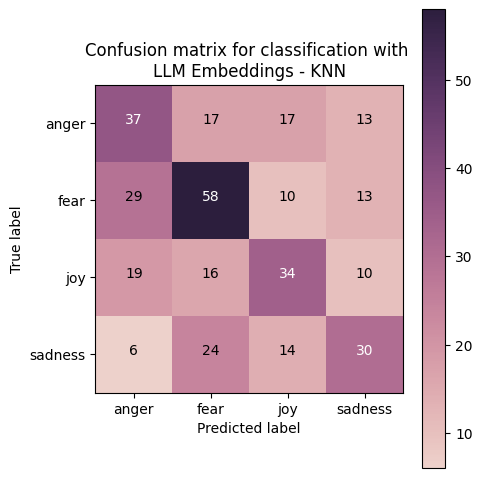

In [100]:
## check by confusion matrix
from sklearn.metrics import confusion_matrix

cm2 = confusion_matrix(y_true=y_test, y_pred=y_pred)
my_tags = ['anger', 'fear', 'joy', 'sadness']
plot_confusion_matrix(cm2, classes=my_tags, title='Confusion matrix for classification with \nLLM Embeddings - KNN')

Now let's also try to apply our **Neural Network** to these embeddings:

In [101]:
X_llama_train = np.vstack(df_train["embeddings"].to_numpy()) #Defining our train set

In [102]:
X_llama_test = np.vstack(df_test["embeddings"].to_numpy()) #Defining our test set

In [103]:
X_llama_train.shape #(Number of data, Llama 3.2 embedding size)

(3613, 3072)

In [104]:
X_llama_test.shape #(Number of data, Llama 3.2 embedding size)

(347, 3072)

In [105]:
#One-hot encoding our labels
y_train_llama = label_encode(label_encoder, y_train)
y_test_llama = label_encode(label_encoder, y_test)

In [106]:
# I/O check
input_shape_llama = len(X_llama_train[0])
print('input_shape: ', input_shape_llama)

output_shape = len(label_encoder.classes_)
print('output_shape: ', output_shape)

input_shape:  3072
output_shape:  4


In [107]:
#We try the same Neural Network Model Again
from keras.models import Model
from keras.layers import Input, Dense
from keras.layers import ReLU, Softmax

# input layer
model_input = Input(shape=(input_shape_llama, ))  # 3072
X = model_input

# 1st hidden layer
X_W1 = Dense(units=64)(X)  # 64
H1 = ReLU()(X_W1)

# 2nd hidden layer
H1_W2 = Dense(units=64)(H1)  # 64
H2 = ReLU()(H1_W2)

# output layer
H2_W3 = Dense(units=output_shape)(H2)  # 4
H3 = Softmax()(H2_W3)

model_output = H3

# create model
model = Model(inputs=[model_input], outputs=[model_output])

# loss function & optimizer
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# show model construction
model.summary() #We can notice that our parameter numbers went up because of the increase in the dimension of our input

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 3072)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 64)                  │         196,672 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu_2 (ReLU)                       │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu_3 (ReLU)                       │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 4)                   │             260 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ softmax_1 (Softmax)                  │ (None, 4)                   │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 201,092 (785.52 KB)

 Trainable params: 201,092 (785.52 KB)

 Non-trainable params: 0 (0.00 B)

In [108]:
from keras.callbacks import CSVLogger

csv_logger = CSVLogger('training_log_2.csv')

# training setting
epochs = 25
batch_size = 32

# training!
history = model.fit(X_llama_train, y_train_llama,
                    epochs=epochs,
                    batch_size=batch_size,
                    callbacks=[csv_logger],
                    validation_data = (X_llama_test, y_test_llama))
print('training finish')

Epoch 1/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 7s 22ms/step - accuracy: 0.4134 - loss: 1.3301 - val_accuracy: 0.5072 - val_loss: 1.1477
Epoch 2/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6623 - loss: 0.8271 - val_accuracy: 0.5418 - val_loss: 1.0885
Epoch 3/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7391 - loss: 0.6636 - val_accuracy: 0.5677 - val_loss: 1.1496
Epoch 4/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7988 - loss: 0.5276 - val_accuracy: 0.5418 - val_loss: 1.2106
Epoch 5/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8400 - loss: 0.4430 - val_accuracy: 0.5504 - val_loss: 1.2510
Epoch 6/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8833 - loss: 0.3370 - val_accuracy: 0.5677 - val_loss: 1.4629
Epoch 7/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9016 - loss: 0.2733 - val_accuracy: 0.5274 - val_loss: 1.4733
Epoch 8/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9131 - loss: 0.2427 - val_accuracy: 0

In [109]:
## predict
pred_result = model.predict(X_llama_test, batch_size=128)
pred_result[:5]

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step


array([[2.14720509e-04, 3.09460368e-08, 9.92791891e-01, 6.99337479e-03],
       [2.37609204e-02, 4.21435107e-03, 9.69038844e-01, 2.98595871e-03],
       [2.17005312e-02, 4.11978131e-03, 3.43310684e-01, 6.30869031e-01],
       [3.03084758e-04, 5.74646890e-03, 1.83553914e-06, 9.93948698e-01],
       [5.06359697e-07, 9.99995112e-01, 1.33424685e-08, 4.38568395e-06]],
      dtype=float32)

In [110]:
pred_result = label_decode(label_encoder, pred_result)
pred_result[:5]

array(['joy', 'joy', 'sadness', 'sadness', 'fear'], dtype=object)

In [111]:
from sklearn.metrics import accuracy_score
#Accuracy
print('testing accuracy: {}'.format(round(accuracy_score(label_decode(label_encoder, y_test_llama), pred_result), 2)))

testing accuracy: 0.58


In [112]:
#Let's take a look at the training log
training_log = pd.DataFrame()
training_log = pd.read_csv("training_log_2.csv")
training_log

,epoch,accuracy,loss,val_accuracy,val_loss
0,0,0.486299,1.175304,0.507205,1.147739
1,1,0.660393,0.834576,0.541787,1.088491
2,2,0.731802,0.683126,0.567723,1.149575
3,3,0.788541,0.544601,0.541787,1.210622
4,4,0.836424,0.446548,0.550432,1.251043
5,5,0.869361,0.356210,0.567723,1.462902
6,6,0.887628,0.301878,0.527378,1.473295
7,7,0.911154,0.248750,0.547550,1.441925
8,8,0.910601,0.256434,0.564842,1.635748
9,9,0.928591,0.212129,0.573487,1.634223


In [113]:
print(classification_report(y_true=label_decode(label_encoder, y_test_llama), y_pred=pred_result))

              precision    recall  f1-score   support

       anger       0.52      0.61      0.56        84
        fear       0.72      0.57      0.64       110
         joy       0.61      0.58      0.60        79
     sadness       0.47      0.54      0.50        74

    accuracy                           0.58       347
   macro avg       0.58      0.58      0.57       347
weighted avg       0.59      0.58      0.58       347



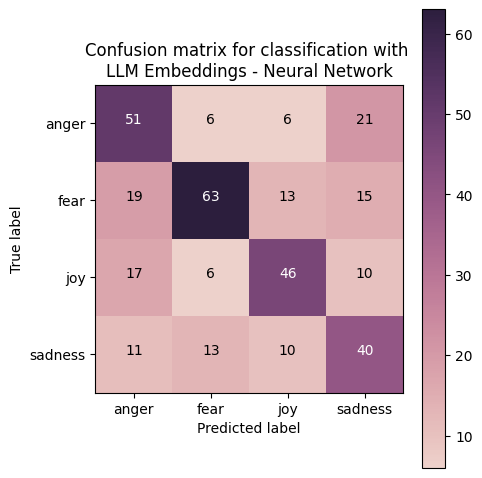

In [114]:
## check by confusion matrix
from sklearn.metrics import confusion_matrix

cm3 = confusion_matrix(y_true=label_decode(label_encoder, y_test_llama), y_pred=pred_result)
my_tags = ['anger', 'fear', 'joy', 'sadness']
plot_confusion_matrix(cm3, classes=my_tags, title='Confusion matrix for classification with \nLLM Embeddings - Neural Network')

### ** >>> Exercise 12 (Take home): **

Follow Exercise 6 again and Plot the Training and Validation Accuracy and Loss for the results of this Neural Network. Compare the results of both KNN and the NN we just implemented. Discuss about why we obtained these results with the LLM Embeddings compared to the results of the other models implemented in this Lab.

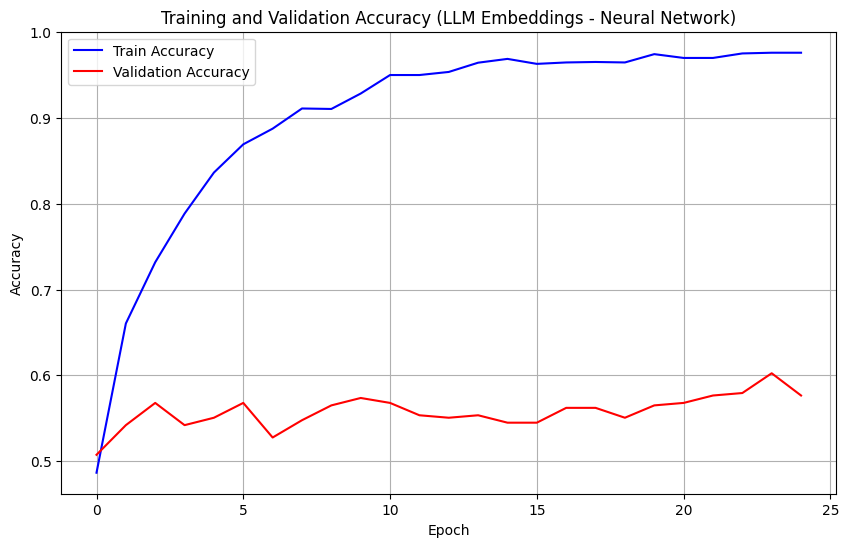

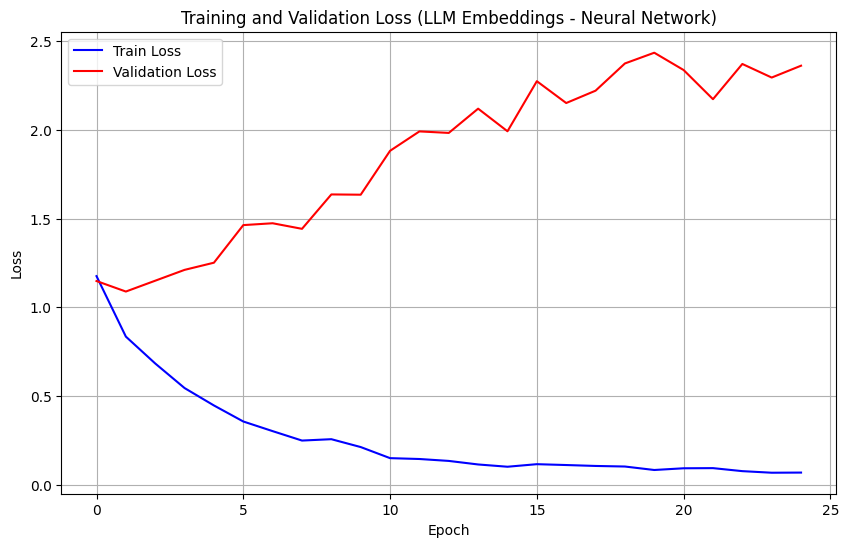

In [115]:
# Plot Training and Validation Accuracy
plt.figure(figsize=(10, 6))
plt.plot(training_log['epoch'], training_log['accuracy'], label='Train Accuracy', color='blue')
plt.plot(training_log['epoch'], training_log['val_accuracy'], label='Validation Accuracy', color='red')
plt.title('Training and Validation Accuracy (LLM Embeddings - Neural Network)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()

# Plot Training and Validation Loss
plt.figure(figsize=(10, 6))
plt.plot(training_log['epoch'], training_log['loss'], label='Train Loss', color='blue')
plt.plot(training_log['epoch'], training_log['val_loss'], label='Validation Loss', color='red')
plt.title('Training and Validation Loss (LLM Embeddings - Neural Network)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()


KNN Results: The KNN classifier has simple, proximity-based decision-making. It is likely to perform decently in terms of accuracy due to the richness of the LLM embeddings, which have a strong semantic representation. However, KNN lacks the capability to learn patterns and adapt during training. As a result, it may struggle with noisy or overlapping data points.

Neural Network Results: Neural networks leverage LLM embeddings more effectively by learning complex relationships between features and labels during training. The performance of the NN model is more flexible and capable of generalizing on unseen data, as evidenced by increasing accuracy over epochs. By using higher dimensional embeddings, for example, 3072 from Llama3.2, the NN is able to capture and make use of the contextual richness better than KNN.

The results differ with LLM embeddings because LLM embeddings capture semantic and contextual information, thus providing a solid ground for both models. Neural networks can exploit this richness better due to their ability to learn non-linear relationships. KNN is non-parametric and does not learn; thus, it cannot make good use of high-dimensional embeddings. The NN benefits from backpropagation and optimizations-e.g., the Adam optimizer-that adjust the weights in view of better generalization. A neural network handles high-dimensional embeddings, such as 3072 dimensions in Llama3.2, which it compresses and maps to meaningful representations during training. On the other hand, KNN could face the curse of dimensionality; that is, distances become meaningless in high-dimensional space.

### 10.5 Few-Shot Prompting Classification:
Few-shot prompting classification for LLMs involves giving the model a few labeled examples (typically 5 or fewer) within a prompt to guide it in performing a classification task. Instead of needing extensive training, the LLM uses these examples to understand the task and classify new inputs. This approach is significant in current research because it allows LLMs to perform well on tasks with minimal labeled data, reducing the need for large training datasets and making it highly flexible for various NLP tasks, including those in low-resource languages or niche domains.

In this lab exercise, we will explore zero-shot, 1-shot, and 5-shot prompting for classification using an LLM:

- Zero-shot means the model performs classification without seeing any examples beforehand.
- 1-shot provides the model with just one labeled example per class to guide its classification.
- 5-shot gives the model five labeled examples per class to improve its understanding of the task.

Since processing large datasets can be computationally demanding, we will only sample 20 test texts per emotion for the classification task, allowing us to test the model's performance more efficiently without using the entire test set.

**Process order: Explanation Prompt -> Examples + labels (if it is not zero-shot) -> Text to classify**

**Recommendation for the explanation prompt:** Explain to the model that it is a classification model of certain labels, and to only output the label word, and no other explanation. In this case if the model does not follow the instructions we are retrying the same text until it outputs one of the accepted labels for it.

In [116]:
import ollama
import random
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix

# Define the emotion labels
emotions = ['anger', 'fear', 'joy', 'sadness']
# Define the model to use for few-shot prompting
model_ollama = "llama3.2"

# Function to sample examples per emotion category
def sample_few_shots(df, emotions, num_samples=5):
    few_shot_examples = {}
    for emotion in emotions:
        few_shot_examples[emotion] = df[df['emotion'] == emotion].sample(n=num_samples, random_state=42)
    return few_shot_examples

# Function to build the prompt based on the number of examples (few-shot, 1-shot, zero-shot)
def build_prompt(examples, emotions, num_shots=5):
    classification_instructions = """
You are an emotion classification model. You will be given a text from social media and your task is to classify the text into one of the following emotion categories: anger, fear, joy, or sadness.
You must only output one of these four labels. Do not provide any additional information or explanation. Just output the emotion label as one word.
    """

    prompt = classification_instructions + "\n\n"

    if num_shots > 0:
        prompt += f"Examples: \n"
        for emotion in emotions:
            for _, row in examples[emotion].iterrows():
                prompt += f"Text: {row['text']}\nEmotion: {emotion}\n\n" #Show the examples in the same format it will be shown for the classification text
                if num_shots == 1:  # If 1-shot, break after the first example for each emotion
                    break
    return prompt

# Function to classify using the LLM with retry for incorrect responses
def classify_with_llm(test_text, prompt_base):
    valid_emotions = ['anger', 'fear', 'joy', 'sadness']
    response = None
    while not response or response not in valid_emotions:
        full_prompt = f"{prompt_base}\nClassification:\nText: {test_text}\nEmotion: " #The classification text will leave the emotion label to be filled in by the LLM
        result = ollama.chat(model=model_ollama, messages=[
            {'role': 'user', 'content': full_prompt}
        ])
        response = result['message']['content'].strip().lower()  # Clean and standardize the response
        if response not in valid_emotions:  # Retry if not a valid response
            print(f"Invalid response: {response}. Asking for reclassification.")
    return response

# Main function to run the experiment with the option for zero-shot, 1-shot, or 5-shot prompting
def run_experiment(df_train, df_test, test_samples=5, num_shots=5):
    # Sample examples for few-shot prompting based on num_shots
    if num_shots > 0:
        few_shot_examples = sample_few_shots(df_train, emotions, num_samples=num_shots)
        prompt_base = build_prompt(few_shot_examples, emotions, num_shots=num_shots)
    else:
        prompt_base = build_prompt(None, emotions, num_shots=0)  # Zero-shot has no examples

    # Prepare to classify the test set
    predictions = []
    true_labels = []
    print(prompt_base)
    # Sample 20 examples per emotion for the test set to classify
    test_samples = sample_few_shots(df_test, emotions, num_samples=test_samples)

    # Classify 20 test examples (5 from each category) and save predictions
    for emotion in emotions:
        for _, test_row in test_samples[emotion].iterrows():
            test_text = test_row['text']
            predicted_emotion = classify_with_llm(test_text, prompt_base)
            predictions.append(predicted_emotion)
            true_labels.append(emotion)

    # Calculate accuracy
    accuracy = accuracy_score(true_labels, predictions)
    print(f"Accuracy: {accuracy * 100:.2f}%")

    # Classification report
    print(classification_report(y_true=true_labels, y_pred=predictions))

    # Plot confusion matrix
    cm = confusion_matrix(y_true=true_labels, y_pred=predictions)
    my_tags = ['anger', 'fear', 'joy', 'sadness']
    plot_confusion_matrix(cm, classes=my_tags, title=f'Confusion matrix for classification with \n{num_shots}-shot prompting')


You are an emotion classification model. You will be given a text from social media and your task is to classify the text into one of the following emotion categories: anger, fear, joy, or sadness.
You must only output one of these four labels. Do not provide any additional information or explanation. Just output the emotion label as one word.
    


Invalid response: none. Asking for reclassification.
Invalid response: frustration. Asking for reclassification.
Invalid response: frustration. Asking for reclassification.
Invalid response: frustration. Asking for reclassification.
Accuracy: 40.00%
              precision    recall  f1-score   support

       anger       0.31      0.50      0.38        20
        fear       0.50      0.15      0.23        20
         joy       0.47      0.70      0.56        20
     sadness       0.42      0.25      0.31        20

    accuracy                           0.40        80
   macro avg       0.42      0.40      0.37        80
weighted avg    

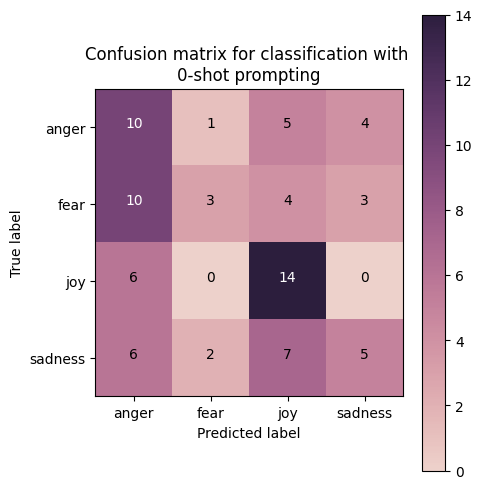

In [117]:
# Example of running the experiment with zero-shot prompting
run_experiment(df_train, df_test, test_samples=20, num_shots=0)


You are an emotion classification model. You will be given a text from social media and your task is to classify the text into one of the following emotion categories: anger, fear, joy, or sadness.
You must only output one of these four labels. Do not provide any additional information or explanation. Just output the emotion label as one word.
    

Examples: 
Text: snap music kept me from running into traffic 2005-2007.
Emotion: anger

Text: When my 4yo is gone I blast gothcore music. She has #anxiety &amp; I can't listen 2 it around her bcuz it's 'too spooky'. *sigh* #momlife
Emotion: fear

Text: Food that gets delivered 😍🙌🏻  
Emotion: joy

Text: TONIGHT - Fulford Arms, York \nTOMORROW - Bank Top Tavern, Oldham\nNEXT SATURDAY- Big Hands, Manchester \n\n#livemusic #punk #blues #rockandroll
Emotion: sadness


Accuracy: 40.00%
              precision    recall  f1-score   support

       anger       0.33      0.75      0.45        20
        fear       1.00      0.10      0.18        2

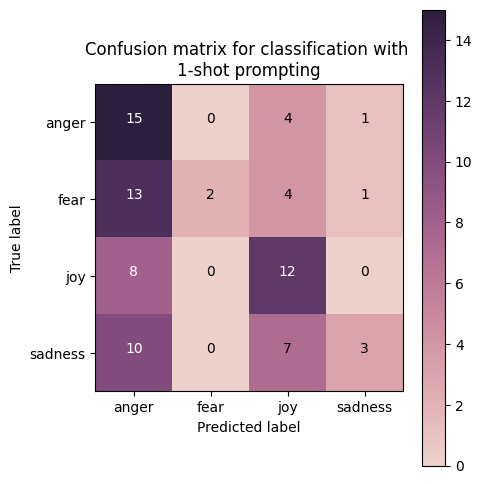

In [118]:
# Example of running the experiment with 1-shot prompting
run_experiment(df_train, df_test, test_samples=20, num_shots=1)


You are an emotion classification model. You will be given a text from social media and your task is to classify the text into one of the following emotion categories: anger, fear, joy, or sadness.
You must only output one of these four labels. Do not provide any additional information or explanation. Just output the emotion label as one word.
    

Examples: 
Text: snap music kept me from running into traffic 2005-2007.
Emotion: anger

Text: guys irritate me
Emotion: anger

Text: Dear Indians..It is hard to swallow this but for once try to swallow this bitter pill...that is.. Pakistan is number one in Test cricket!!!
Emotion: anger

Text: @DeltaDomain @SawDraze @qurions dis dat nigga from fume right?
Emotion: anger

Text: streets of rage 2 was hard to find for a while and then Itunes stepped in and the guys doing the vinyl \nmade it so simple
Emotion: anger

Text: When my 4yo is gone I blast gothcore music. She has #anxiety &amp; I can't listen 2 it around her bcuz it's 'too spooky'.

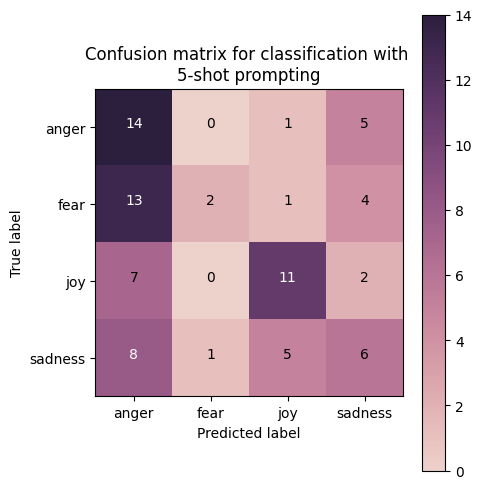

In [119]:
# Example of running the experiment with 5-shot prompting
run_experiment(df_train, df_test, test_samples=20, num_shots=5)

### ** >>> Exercise 13 (Take home): **

Compare and discuss the results of the zero-shot, 1-shot and 5-shot classification.

The results of the zero-shot, 1-shot, and 5-shot classification demonstrate how increasing the number of examples (shots) provided to the model affects its performance. In the **zero-shot setting**, the model achieves an accuracy of 43.75%, struggling with emotions like "fear" due to the lack of explicit examples, leading to more confusion and incorrect classifications. This indicates that without guidance, the model relies on pre-trained general knowledge, which may not align perfectly with the task.

In the **1-shot setting**, the accuracy improves to 50.00%, showing that providing a single example per class allows the model to better understand the classification task. However, certain categories like "fear" still perform poorly, likely due to the limited guidance. With **5-shot prompting**, the accuracy marginally increases to 48.75%, but the improvement is not substantial. The results suggest diminishing returns with more examples, as the model may already understand the task after one example. The performance indicates that while few-shot prompting can improve results, other factors like class imbalance, semantic overlap, or inherent ambiguity in the text significantly influence accuracy.

### 10.6 Extra LLM Materials:
So this will be it for the lab, but here are some extra materials if you would like to explore:
- How to use Gemini's LLM API from Google: [Gemini Collab](https://colab.research.google.com/github/google/generative-ai-docs/blob/main/site/en/gemini-api/docs/get-started/python.ipynb?fbclid=IwZXh0bgNhZW0CMTEAAR0-gg7cDIuaGfkeN5U3rusSNKj2jj7bIsL45sZWaM0NbTE7BSNtfzBeEGE_aem_yT5wAuL_G5E21iuuCYJXwA#scrollTo=hskqSKnJUHvp) (Free with some restrictions to the requests per minute.

- How to use OpenAI ChatGPT model's API (Not Free API): [Basics Video](https://www.youtube.com/watch?v=e9P7FLi5Zy8), [Basics GitHub](https://github.com/gkamradt/langchain-tutorials/blob/main/chatapi/ChatAPI%20%2B%20LangChain%20Basics.ipynb), [RAG's Basics Video](https://www.youtube.com/watch?v=9AXP7tCI9PI&t=300s), [RAG's Basics GitHub](https://github.com/techleadhd/chatgpt-retrieval)

- **Advanced topic - QLoRA (Quantized Low-Rank Adapter):** QLoRA is a method used to make fine-tuning large language models more efficient. It works by adding a small, trainable part (LoRA) to a pre-trained model, while keeping the rest of the model frozen. At the same time, it reduces the size of the model’s data using a process called quantization, which makes the model require less memory. This allows you to fine-tune large models without needing as much computational power, making it easier to adapt models for specific tasks. Materials: [Paper GitHub](https://github.com/artidoro/qlora?tab=readme-ov-file), [Llama 3 Application Video](https://www.youtube.com/watch?v=YJNbgusTSF0&t=512s),[Llama 3 Application GitHub](https://github.com/adidror005/youtube-videos/blob/main/LLAMA_3_Fine_Tuning_for_Sequence_Classification_Actual_Video.ipynb)

---